In [1]:
from subprocess import Popen, PIPE, STDOUT
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (3, 3);mpl.rcParams['lines.linewidth'] = 2;mpl.rcParams['lines.markersize'] = 6;
pylab.rcParams['lines.markeredgewidth'] =  0.5;matplotlib.rcParams.update({'font.size': 13})

Populating the interactive namespace from numpy and matplotlib


In [2]:
def run_BCmodel(parameters, jar_path,quiet=False):
    proc = Popen(['java', '-jar', jar_path]+parameters, stdout=PIPE, stderr=STDOUT)
    with proc.stdout:
        for line in iter(proc.stdout.readline, b''):
            if quiet:
                continue
            sys.stdout.write(line)
            
def generate_BCmodel(filename, jar_path,quiet=False):
    proc = Popen(['java', '-jar', jar_path]+["Generate",filename], stdout=PIPE, stderr=STDOUT)
    with proc.stdout:
        for line in iter(proc.stdout.readline, b''):
            if quiet:
                continue
            sys.stdout.write(line)
            
def get_parameters(filename,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1=None,perturbation_state_1=None,perturbation_node_2=None,perturbation_state_2=None,perturbation_node_3=None,perturbation_state_3=None):
    #args[0] is the mode in which to run the program. Options: "Run", "Generate", "GenerateAndRun", "BreastCancerModel_ZanudoEtAl2017"
    #args[1] is the name of the TXT file where the model is.
    #args[2] is the number of initial conditions to run.
    #args[3] is the number of normalized time steps (number of timesteps equal to the average time needed to update a slow node) to run.
    #args[4] Whether to write to file the . Takes the values (without quotes) "true" or "false".
    #args[5] is the node name of the first perturbation, args[6] is the state of the first perturbation
    #args[7] is the node name of the second perturbation, args[8] is the state of the second perturbation
    #args[9] is the node name of the second perturbation, args[10] is the state of the second perturbation
    parameters=["Run",filename,str(initial_conditions),str(normalized_time_steps),write_timecourse]
    if(perturbation_node_1 is not None):
        parameters.append(perturbation_node_1)
        parameters.append(perturbation_state_1)
        if(perturbation_node_2 is not None):
            parameters.append(perturbation_node_2)
            parameters.append(perturbation_state_2)
            if(perturbation_node_3 is not None):
                parameters.append(perturbation_node_3)
                parameters.append(perturbation_state_3)
    return(parameters)

def read_in_timecourse(basename,perturbation_nodes,perturbation_states):
    perturbation_string="_".join([x[0]+"="+x[1] for x in zip(perturbation_nodes,perturbation_states)])
    if(perturbation_string!=""):
        timecourse_file_name='timecourse'+basename+"_"+perturbation_string+'.txt'
    else:
        timecourse_file_name='timecourse'+basename+perturbation_string+'.txt'
    df=pd.read_csv(timecourse_file_name,sep='\t',index_col=0)
    df=df.dropna(axis=1)
    df=df.append(pd.DataFrame(data=[df.columns],index=["time"],columns=df.columns,dtype="float64"))
    df.columns=[i for i,j in enumerate(df.columns)]
    df_timecourse=df
    return(df_timecourse)

In [5]:
jar_path="../dist/BreastCancerModel.jar"
filename_model="../Models/BreastCancerModel_Mod0420.booleannet"
basename=os.path.basename(filename_model).split(".")[0]
initial_conditions=1000
normalized_time_steps=25
write_timecourse="true"

In [6]:
generate_BCmodel(filename_model,jar_path)

File could not be found.
Exiting program


In [5]:
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
No Perturbation	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.25


In [6]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	1.0	0.0	0.0	0.5	1.0	0.0	0.0	0.0	0.25


In [7]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="FOXO3"
perturbation_state_2="0"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	FOXO3=0	0.345	0.0	0.0	0.1725	1.0	1.0	0.0	0.0	0.5


In [8]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="pRb_2"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	pRb_2=1	1.0	0.0	0.0	0.5	1.0	1.0	0.001	0.0	0.5005


In [9]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="Fulvestrant"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	Fulvestrant=1	1.0	0.0	0.0	0.5	0.0	0.0	0.0	0.0	0.0


In [10]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="Palbociclib"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	Palbociclib=1	1.0	0.0	0.0	0.5	1.0	0.0	0.0	0.0	0.25


In [11]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="S63845"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	S63845=1	1.0	1.0	0.0	1.0	1.0	0.0	0.0	0.0	0.25


In [12]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="Navitoclax"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	Navitoclax=1	1.0	0.0	0.0	0.5	1.0	0.0	0.0	0.0	0.25


In [13]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="p21_p27"
perturbation_state_2="0"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	p21_p27=0	1.0	0.0	0.0	0.5	1.0	1.0	0.001	0.0	0.5005


In [14]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="TSC"
perturbation_state_2="0"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	TSC=0	1.0	0.0	0.0	0.5	1.0	0.0	1.0	0.0	1.0


In [15]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="PTEN"
perturbation_state_2="0"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	PTEN=0	0.0	0.0	0.0	0.0	1.0	1.0	1.0	0.0	1.0


In [16]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="MYC_2"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	MYC_2=1	1.0	0.0	0.0	0.5	1.0	1.0	1.0	0.0	1.0


In [17]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="SGK1"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	SGK1=1	0.348	0.0	0.0	0.174	1.0	1.0	1.0	0.0	1.0


In [18]:
perturbation_node_1="Alpelisib"
perturbation_state_1="1"
perturbation_node_2="PIM"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Alpelisib=1	PIM=1	0.0	0.0	0.0	0.0	1.0	1.0	1.0	0.0	1.0


In [19]:
perturbation_node_1="Palbociclib"
perturbation_state_1="1"
perturbation_node_2="pRb_2"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Palbociclib=1	pRb_2=1	0.0	0.0	0.0	0.0	1.0	1.0	1.0	0.0	1.0


In [20]:
perturbation_node_1="Fulvestrant"
perturbation_state_1="1"
perturbation_node_2="pRb_2"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Fulvestrant=1	pRb_2=1	0.0	0.0	0.0	0.0	1.0	1.0	0.0	0.0	0.5


In [21]:
perturbation_node_1="Palbociclib"
perturbation_state_1="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Palbociclib=1	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.25


In [22]:
perturbation_node_1="Fulvestrant"
perturbation_state_1="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Fulvestrant=1	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.25


In [23]:
perturbation_node_1="Palbociclib"
perturbation_state_1="1"
perturbation_node_2="Fulvestrant"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Palbociclib=1	Fulvestrant=1	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.25


In [24]:
perturbation_node_1="Fulvestrant"
perturbation_state_1="1"
perturbation_node_2="MYC_2"
perturbation_state_2="1"
parameters=get_parameters(filename_model,initial_conditions,normalized_time_steps,write_timecourse,perturbation_node_1,perturbation_state_1,perturbation_node_2,perturbation_state_2)
run_BCmodel(parameters, jar_path,quiet=False)


Filename: models/BreastCancerModel_Mod0420.booleannet
Creating network model based on Boolean tables, functions, and names files...
Model created.
Perturbation1	Perturbation2	Apofrac1	Apofrac2	Apofrac3	Apofrac	Prolfrac1	Prolfrac2	Prolfrac3	Prolfrac4	Prolfrac
Fulvestrant=1	MYC_2=1	0.0	0.0	0.0	0.0	1.0	1.0	1.0	0.0	1.0


In [25]:
perturbation_nodes=[perturbation_node_1,perturbation_node_2]
perturbation_states=[perturbation_state_1,perturbation_state_2]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse

0         1         2         3        4    \
ER_transcription_feedback_2  0.000  0.000000  0.000000  0.000000  0.00000   
ER_transcription_feedback_1  0.000  0.000000  0.000000  0.000000  0.00000   
ER_transcription_2           0.000  0.000000  0.000000  0.000000  0.00000   
ER_transcription             1.000  1.000000  1.000000  0.983000  0.94300   
Proliferation_3              1.000  1.000000  1.000000  1.000000  1.00000   
Proliferation_4              0.000  0.000000  0.000000  0.000000  0.00000   
Proliferation_2              1.000  1.000000  1.000000  1.000000  1.00000   
Proliferation                1.000  1.000000  1.000000  1.000000  1.00000   
MYC_targets_2                1.000  1.000000  1.000000  1.000000  1.00000   
cycD_CDK46_2                 0.000  0.000000  0.000000  0.065000  0.18500   
Apoptosis_3                  0.000  0.000000  0.000000  0.000000  0.00000   
Apoptosis_2                  0.000  0.000000  0.000000  0.000000  0.00000   
Ipatasertib                  0.000  0.000000  0.000000  0.000000  0.00000   
cycE_CDK2_T                  1.000  1.000000  1.000000  1.000000  1.00000   
MYC_targets                  1.000  1.000000  1.000000  1.000000  1.00000   
Palbociclib                  0.000  0.000000  0.000000  0.000000  0.00000   
Translation                  1.000  1.000000  1.000000  1.000000  1.00000   
Fulvestrant                  0.000  0.000000  1.000000  1.000000  1.00000   
Navitoclax                   0.000  0.000000  0.000000  0.000000  0.00000   
cycD_CDK46                   1.000  1.000000  1.000000  1.000000  1.00000   
Trametinib                   0.000  0.000000  0.000000  0.000000  0.00000   
Everolimus                   0.000  0.000000  0.000000  0.000000  0.00000   
Apoptosis                    0.000  0.000000  0.000000  0.000000  0.00000   
p21_p27_T                    0.000  0.000000  0.000000  0.000000  0.00000   
mTORC2_pm                    1.000  1.000000  1.000000  1.000000  1.00000   
Neratinib                    0.000  0.000000  0.000000  0.000000  0.00000   
Alpelisib                    0.000  0.000000  0.000000  0.000000  0.00000   
cycE_CDK2                    1.000  1.000000  1.000000  1.000000  1.00000   
cyclinD_2                    0.000  0.000000  0.000000  0.172000  0.32400   
HER2_3_2                     0.000  0.000000  0.000000  0.000000  0.00000   
...                            ...       ...       ...       ...      ...   
RAS_3                        0.000  0.000000  0.000000  0.000000  0.00000   
RAS_2                        0.000  0.000000  0.000000  0.000000  0.00000   
IGF1R                        1.000  1.000000  1.000000  1.000000  1.00000   
FOXA1                        1.000  1.000000  1.000000  1.000000  1.00000   
HER3                         0.000  0.000000  0.000000  0.000000  0.00000   
HER2                         0.000  0.000000  0.000000  0.000000  0.00000   
BCL2                         0.000  0.000000  0.000000  0.000000  0.00000   
PBX1                         1.000  1.000000  1.000000  1.000000  1.00000   
ESR1                         1.000  1.000000  1.000000  0.802000  0.66500   
MCL1                         1.000  1.000000  1.000000  1.000000  1.00000   
SGK1                         0.000  0.000000  0.000000  0.000000  0.00000   
PIP3                         1.000  1.000000  1.000000  1.000000  1.00000   
MAPK                         1.000  1.000000  1.000000  1.000000  1.00000   
PDK1                         0.000  0.000000  0.000000  0.000000  0.00000   
PI3K                         1.000  1.000000  1.000000  1.000000  1.00000   
PTEN                         1.000  1.000000  1.000000  1.000000  1.00000   
PIM                          0.000  0.000000  0.000000  0.000000  0.00000   
AKT                          1.000  1.000000  1.000000  1.000000  1.00000   
S6K                          1.000  1.000000  1.000000  1.000000  1.00000   
BIM                          0.334  0.334000  0.334000  0.334000  0.33400   
BAD                        

In [26]:
perturbation_nodes=[]
perturbation_states=[]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_0=df_timecourse.T

perturbation_nodes=["Alpelisib"]
perturbation_states=["1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1=df_timecourse.T

perturbation_nodes=["Alpelisib","FOXO3"]
perturbation_states=["1","0"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_foxo3_0=df_timecourse.T

perturbation_nodes=["Alpelisib","pRb_2"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_pRb2_1=df_timecourse.T

perturbation_nodes=["Alpelisib","MYC_2"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_MYC2_1=df_timecourse.T

perturbation_nodes=["Fulvestrant","MYC_2"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_fulvestrant_1_MYC2_1=df_timecourse.T

perturbation_nodes=["Alpelisib","Fulvestrant"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_fulvestrant_1=df_timecourse.T

perturbation_nodes=["Alpelisib","Palbociclib"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_palbociclib_1=df_timecourse.T

perturbation_nodes=["Alpelisib","S63845"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_S63845_1=df_timecourse.T

perturbation_nodes=["Alpelisib","Navitoclax"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_Navitoclax_1=df_timecourse.T

perturbation_nodes=["Alpelisib","p21_p27"]
perturbation_states=["1","0"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_P21P27_0=df_timecourse.T

perturbation_nodes=["Alpelisib","TSC"]
perturbation_states=["1","0"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_TSC_0=df_timecourse.T

perturbation_nodes=["Alpelisib","PTEN"]
perturbation_states=["1","0"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_PTEN_0=df_timecourse.T

perturbation_nodes=["Alpelisib","SGK1"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_SGK1_1=df_timecourse.T

perturbation_nodes=["Alpelisib","PIM"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_1_PIM1_1=df_timecourse.T

perturbation_nodes=["Palbociclib","pRb_2"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_palbociclib_1_pRb2_1=df_timecourse.T

perturbation_nodes=["Fulvestrant","pRb_2"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_fulvestrant_1_pRb2_1=df_timecourse.T

perturbation_nodes=["Palbociclib","Fulvestrant"]
perturbation_states=["1","1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_palbociclib_1_fulvestrant_1=df_timecourse.T

perturbation_nodes=["Fulvestrant"]
perturbation_states=["1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_fulvestrant_1=df_timecourse.T

perturbation_nodes=["Palbociclib"]
perturbation_states=["1"]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_palbociclib_1=df_timecourse.T

In [76]:
Proliferation_norm=[]
Apoptosis_norm=[]
Perturbation=[]

df_timecourse=df_timecourse_alpelisib_0
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("None")

df_timecourse=df_timecourse_alpelisib_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib")

df_timecourse=df_timecourse_alpelisib_1_foxo3_0
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+FOXO3=0")

df_timecourse=df_timecourse_alpelisib_1_pRb2_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+pRb=2")

df_timecourse=df_timecourse_alpelisib_1_MYC2_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+MYC=2")

df_timecourse=df_timecourse_fulvestrant_1_MYC2_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Fulvestrant+MYC=2")

df_timecourse=df_timecourse_alpelisib_1_fulvestrant_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+Fulvestrant")

df_timecourse=df_timecourse_alpelisib_1_palbociclib_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+Palbociclib")

df_timecourse=df_timecourse_alpelisib_1_S63845_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+S63845")

df_timecourse=df_timecourse_alpelisib_1_Navitoclax_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+Navitoclax")

df_timecourse=df_timecourse_alpelisib_1_P21P27_0
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+p21/p27=0")

df_timecourse=df_timecourse_alpelisib_1_TSC_0
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+TSC=0")

df_timecourse=df_timecourse_alpelisib_1_PTEN_0
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+PTEN=0")

df_timecourse=df_timecourse_alpelisib_1_SGK1_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+SGK1=1")

df_timecourse=df_timecourse_alpelisib_1_PIM1_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Alpelisib+PIM=1")

df_timecourse=df_timecourse_palbociclib_1_pRb2_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Palbociclib+pRb=2")

df_timecourse=df_timecourse_fulvestrant_1_pRb2_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Fulvestrant+pRb=2")

df_timecourse=df_timecourse_palbociclib_1_fulvestrant_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Fulvestrant+Palbociclib")

df_timecourse=df_timecourse_fulvestrant_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Fulvestrant")

df_timecourse=df_timecourse_palbociclib_1
Proliferation_norm.append(df_timecourse.iloc[-1,]["Proliferation_norm"])
Apoptosis_norm.append(df_timecourse.iloc[-1,]["Apoptosis_norm"])
Perturbation.append("Palbociclib")

df_model_results=pd.DataFrame(list(zip(Proliferation_norm, Apoptosis_norm,Perturbation)), columns =["Proliferation_norm", "Apoptosis_norm","Perturbation"])


In [77]:
df_model_results

Proliferation_norm  Apoptosis_norm             Perturbation
0               1.0000          0.0000                     None
1               0.2500          0.5000                Alpelisib
2               0.5000          0.1725        Alpelisib+FOXO3=0
3               0.5005          0.5000          Alpelisib+pRb=2
4               1.0000          0.5000          Alpelisib+MYC=2
5               1.0000          0.0000        Fulvestrant+MYC=2
6               0.0000          0.5000    Alpelisib+Fulvestrant
7               0.2500          0.5000    Alpelisib+Palbociclib
8               0.2500          1.0000         Alpelisib+S63845
9               0.2500          0.5000     Alpelisib+Navitoclax
10              0.5005          0.5000      Alpelisib+p21/p27=0
11              1.0000          0.5000          Alpelisib+TSC=0
12              1.0000          0.0000         Alpelisib+PTEN=0
13              1.0000          0.1740         Alpelisib+SGK1=1
14              1.0000          0.0000          Alpelisib+PIM=1
15              1.0000          0.0000        Palbociclib+pRb=2
16              0.5000          0.0000        Fulvestrant+pRb=2
17              0.2500          0.0000  Fulvestrant+Palbociclib
18              0.2500          0.0000              Fulvestrant
19              0.2500          0.0000              Palbociclib

# Plots of timecourses of multiple nodes

In [8]:
perturbation_nodes=[]
perturbation_states=[]
df_timecourse=read_in_timecourse(basename,perturbation_nodes,perturbation_states)
df_timecourse_alpelisib_0=df_timecourse.T

df_timecourse_alpelisib_0

ER_transcription_feedback_2  ER_transcription_feedback_1  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   
5                            0.0                          0.0   
6                            0.0                          0.0   
7                            0.0                          0.0   
8                            0.0                          0.0   
9                            0.0                          0.0   
10                           0.0                          0.0   
11                           0.0                          0.0   
12                           0.0                          0.0   
13                           0.0                          0.0   
14                           0.0                          0.0   
15                           0.0                          0.0   
16                           0.0                          0.0   
17                           0.0                          0.0   
18                           0.0                          0.0   
19                           0.0                          0.0   
20                           0.0                          0.0   
21                           0.0                          0.0   
22                           0.0                          0.0   
23                           0.0                          0.0   
24                           0.0                          0.0   
25                           0.0                          0.0   
26                           0.0                          0.0   
27                           0.0                          0.0   
28                           0.0                          0.0   
29                           0.0                          0.0   
..                           ...                          ...   
95                           0.0                          0.0   
96                           0.0                          0.0   
97                           0.0                          0.0   
98                           0.0                          0.0   
99                           0.0                          0.0   
100                          0.0                          0.0   
101                          0.0                          0.0   
102                          0.0                          0.0   
103                          0.0                          0.0   
104                          0.0                          0.0   
105                          0.0                          0.0   
106                          0.0                          0.0   
107                          0.0                          0.0   
108                          0.0                          0.0   
109                          0.0                          0.0   
110                          0.0                          0.0   
111                          0.0                          0.0   
112                          0.0                          0.0   
113                          0.0                          0.0   
114                          0.0                          0.0   
115                          0.0                          0.0   
116                          0.0                          0.0   
117                          0.0                          0.0   
118                          0.0                          0.0   
119                          0.0                          0.0   
120                          0.0                          0.0   
121                          0.0                          0.0   
122                          0.0                          0.0   
123                          0.0                          0.0   
124                          0.0        

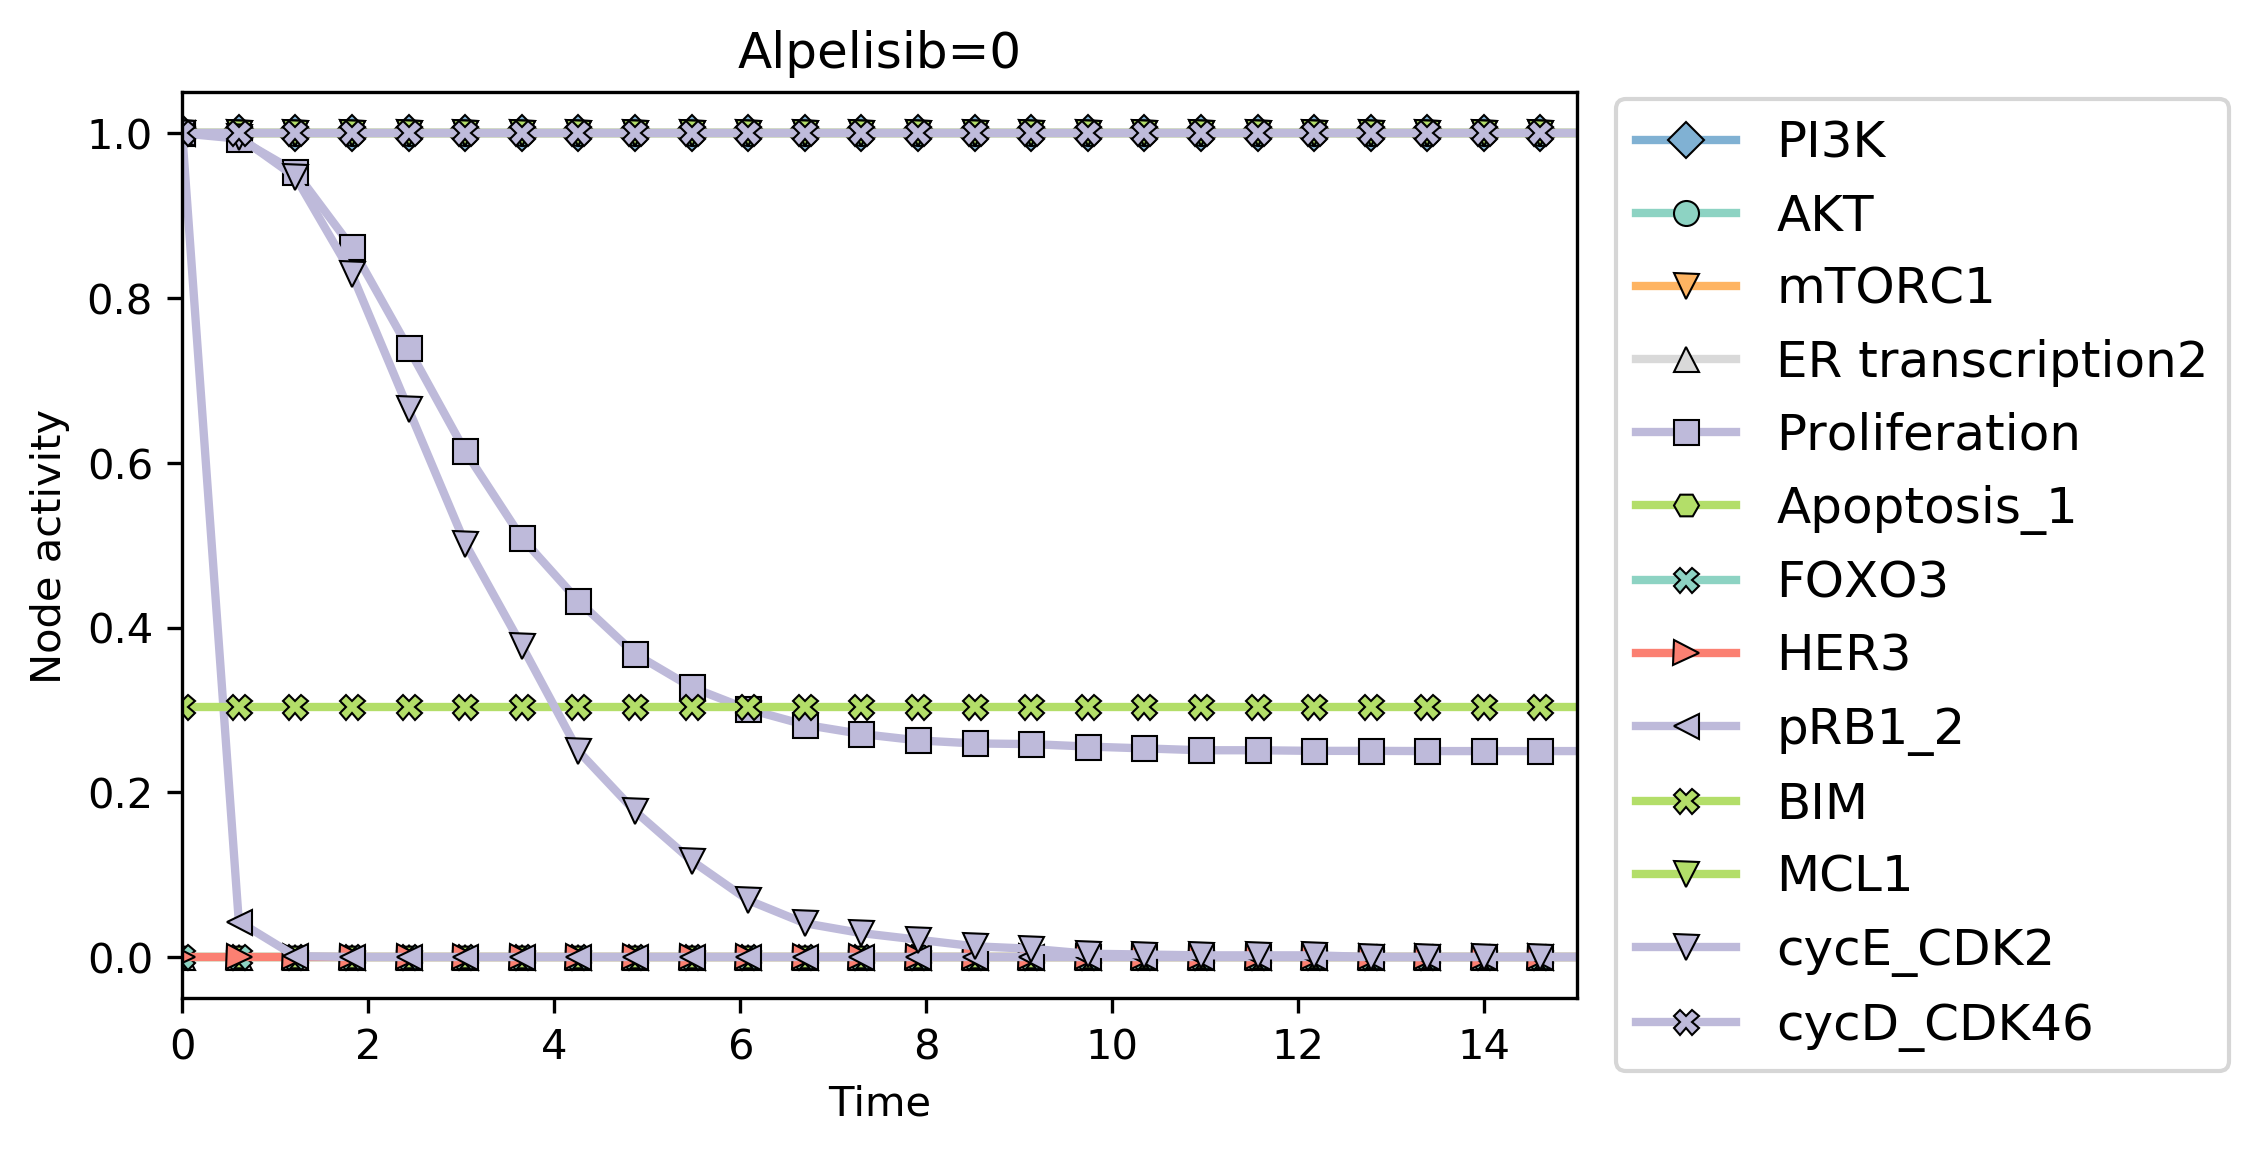

In [9]:
filename='figures/BreastCancerModel_Mod0420'
df_plot=df_timecourse_alpelisib_0.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='X',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MCL1',marker='v',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='cycE_CDK2',marker='v',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='cycD_CDK46',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)

plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis_1',"FOXO3","HER3","pRB1_2","BIM","MCL1","cycE_CDK2","cycD_CDK46"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=0")
plt.xlim([0,15])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png")

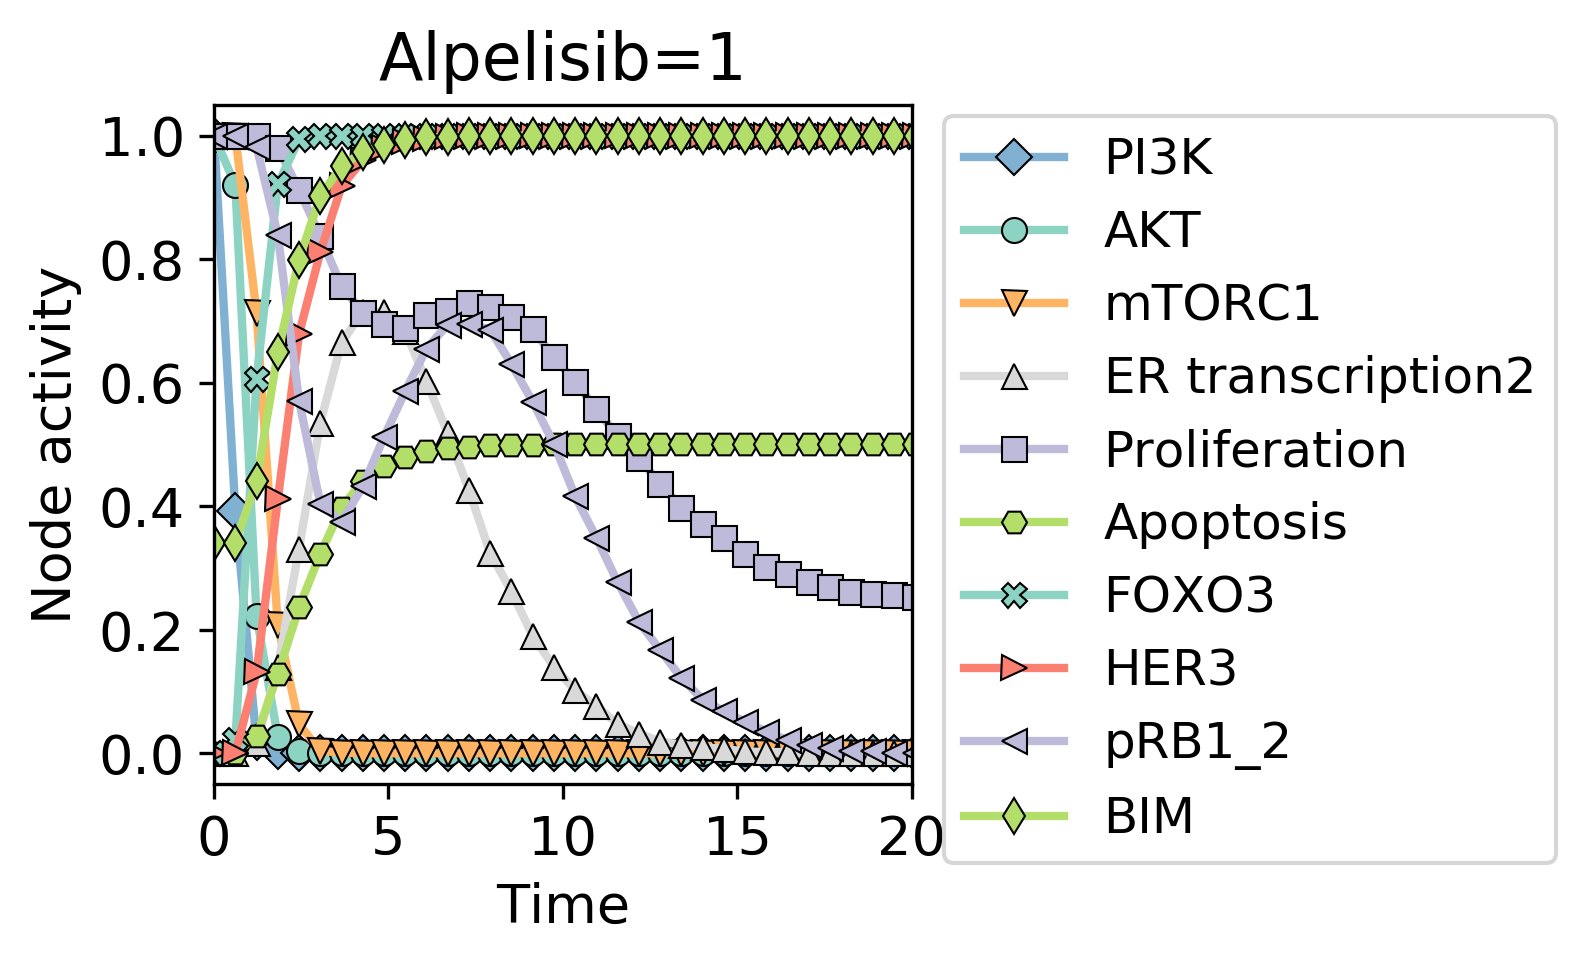

In [31]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png")

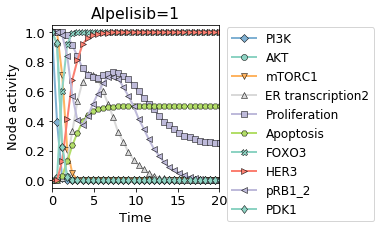

In [32]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='PDK1_pm',marker='d',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","PDK1"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
plt.show()

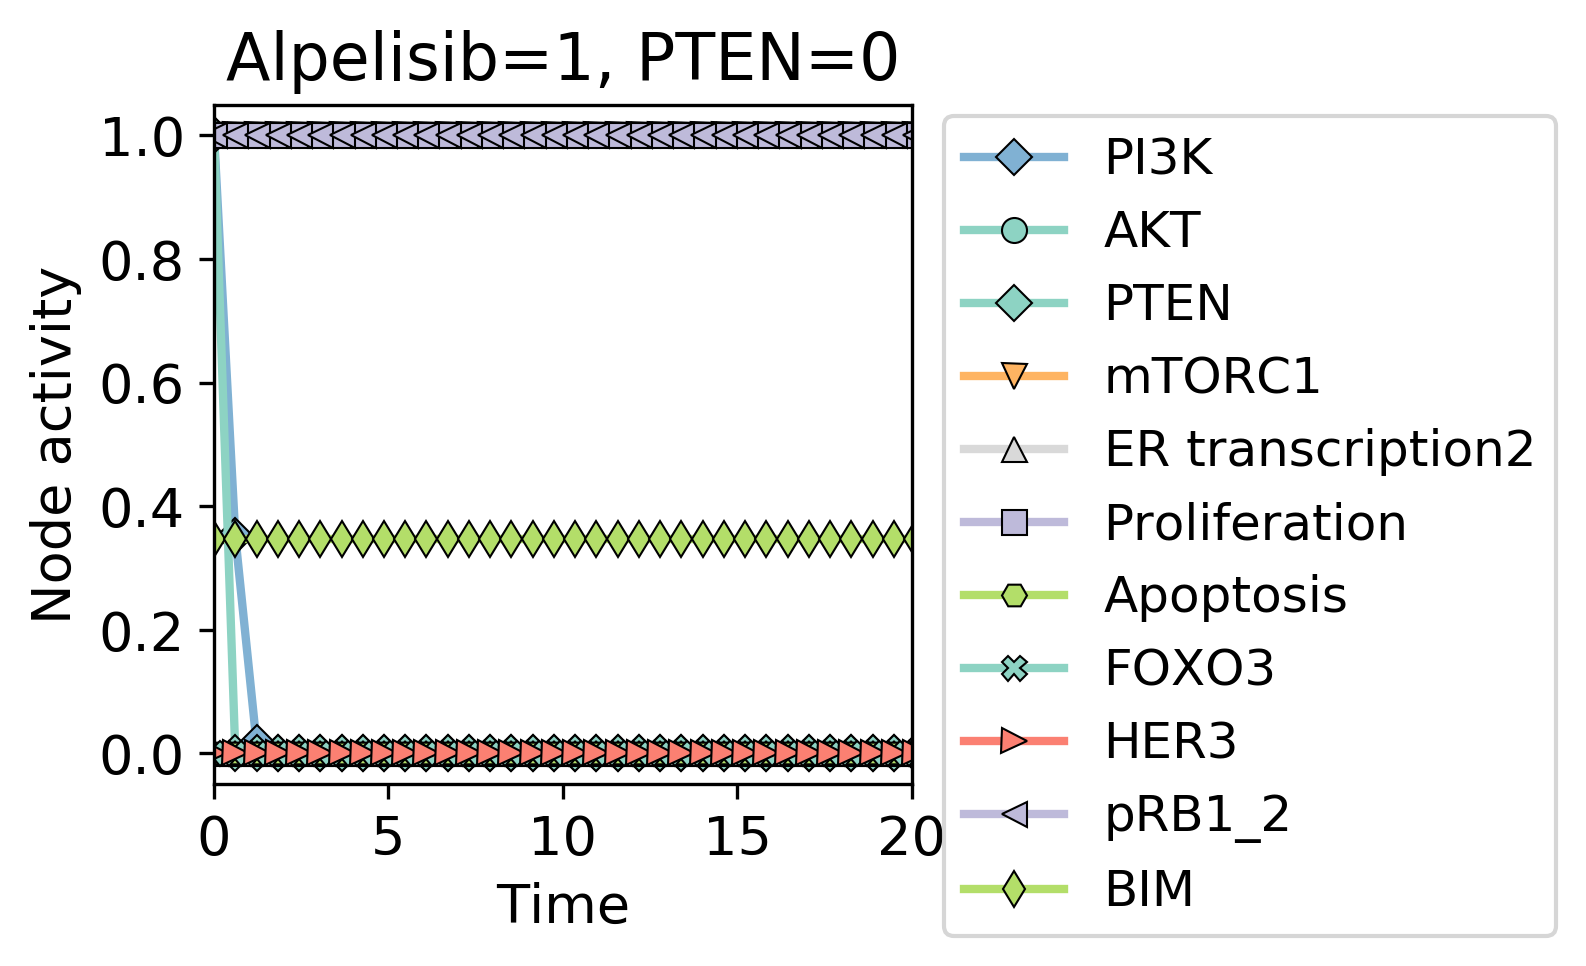

In [33]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_PTEN_0'
df_plot=df_timecourse_alpelisib_1_PTEN_0.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='PTEN', marker='D',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT',"PTEN",'mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, PTEN=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png")

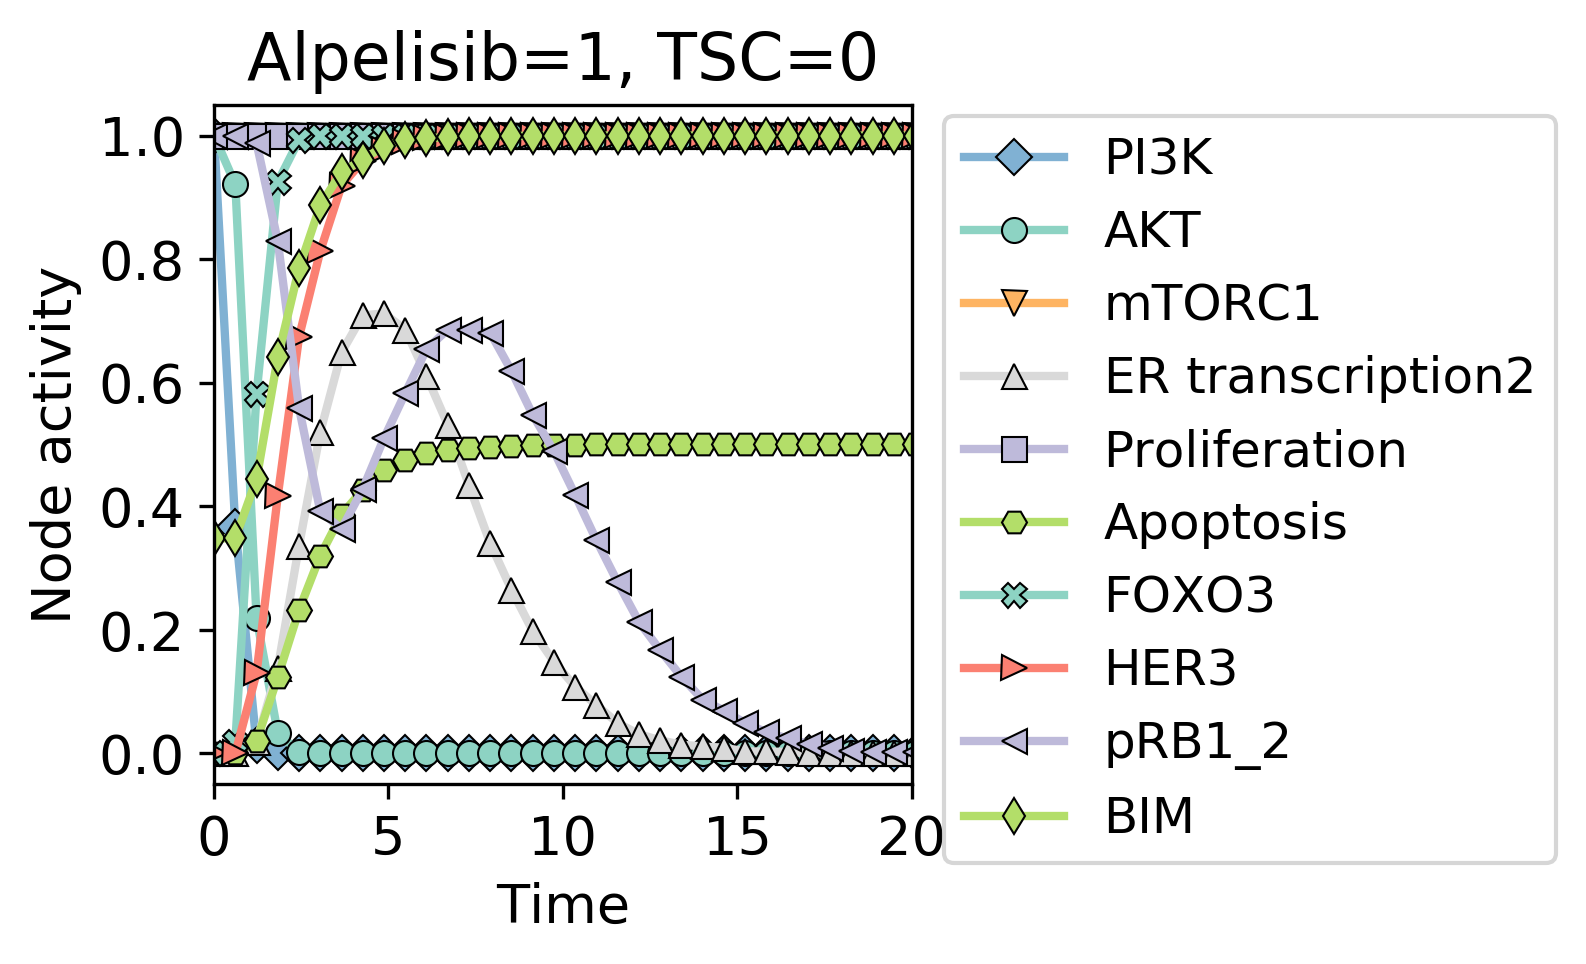

In [34]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_TSC_0'
df_plot=df_timecourse_alpelisib_1_TSC_0.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, TSC=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png")

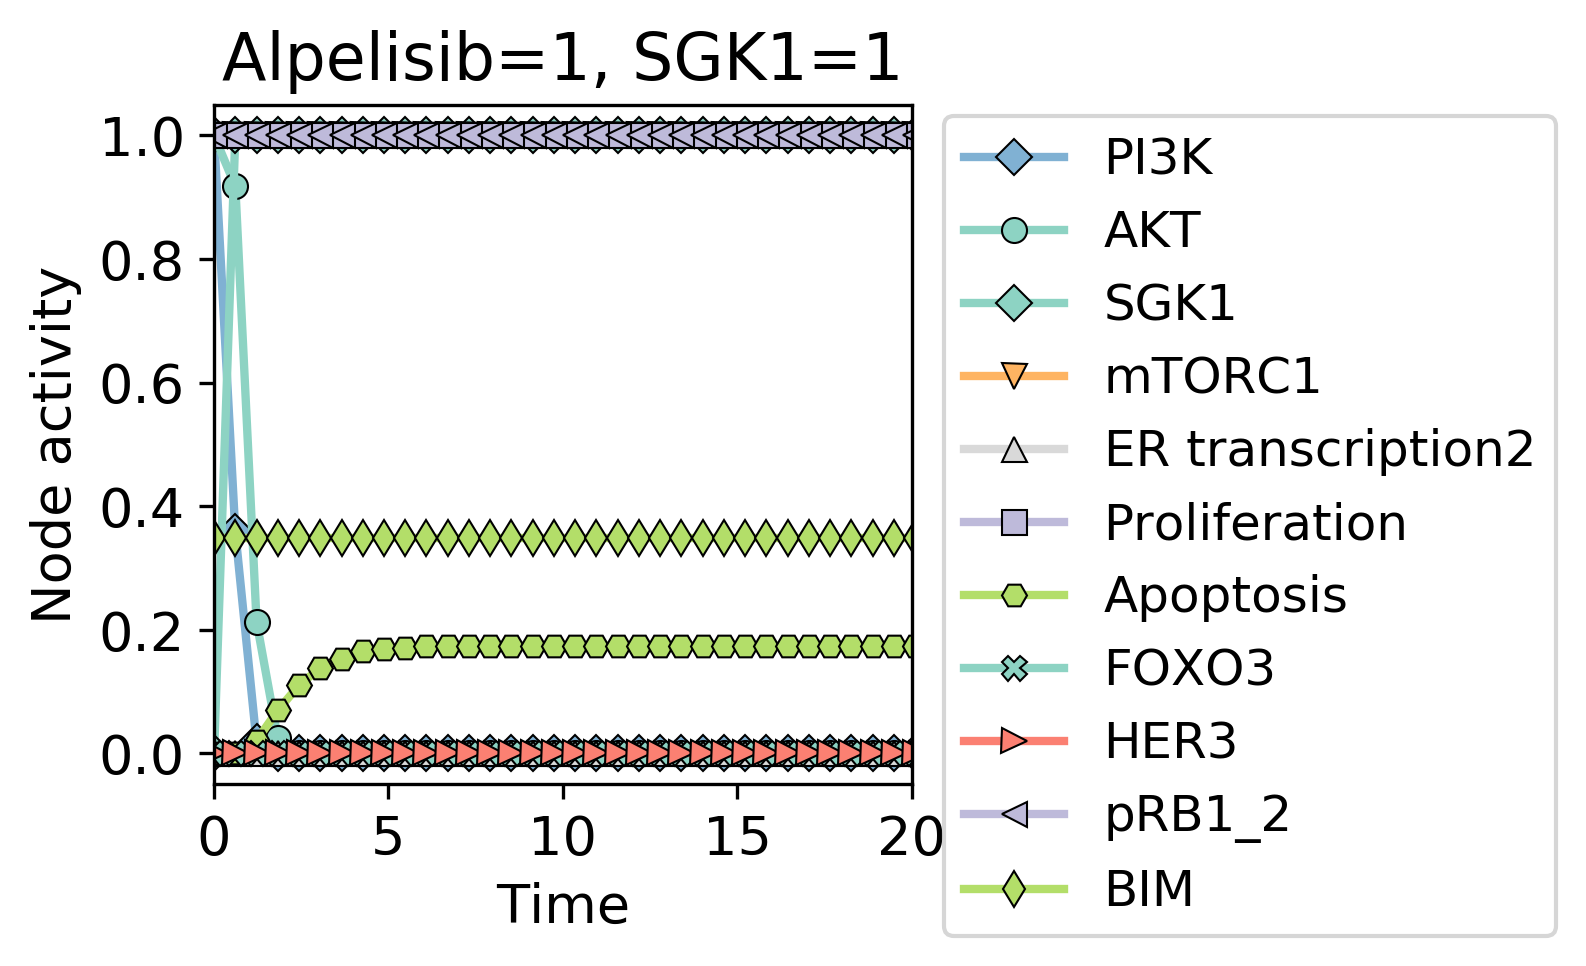

In [35]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_SGK1_1'
df_plot=df_timecourse_alpelisib_1_SGK1_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='SGK1', marker='D',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT',"SGK1",'mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, SGK1=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png")

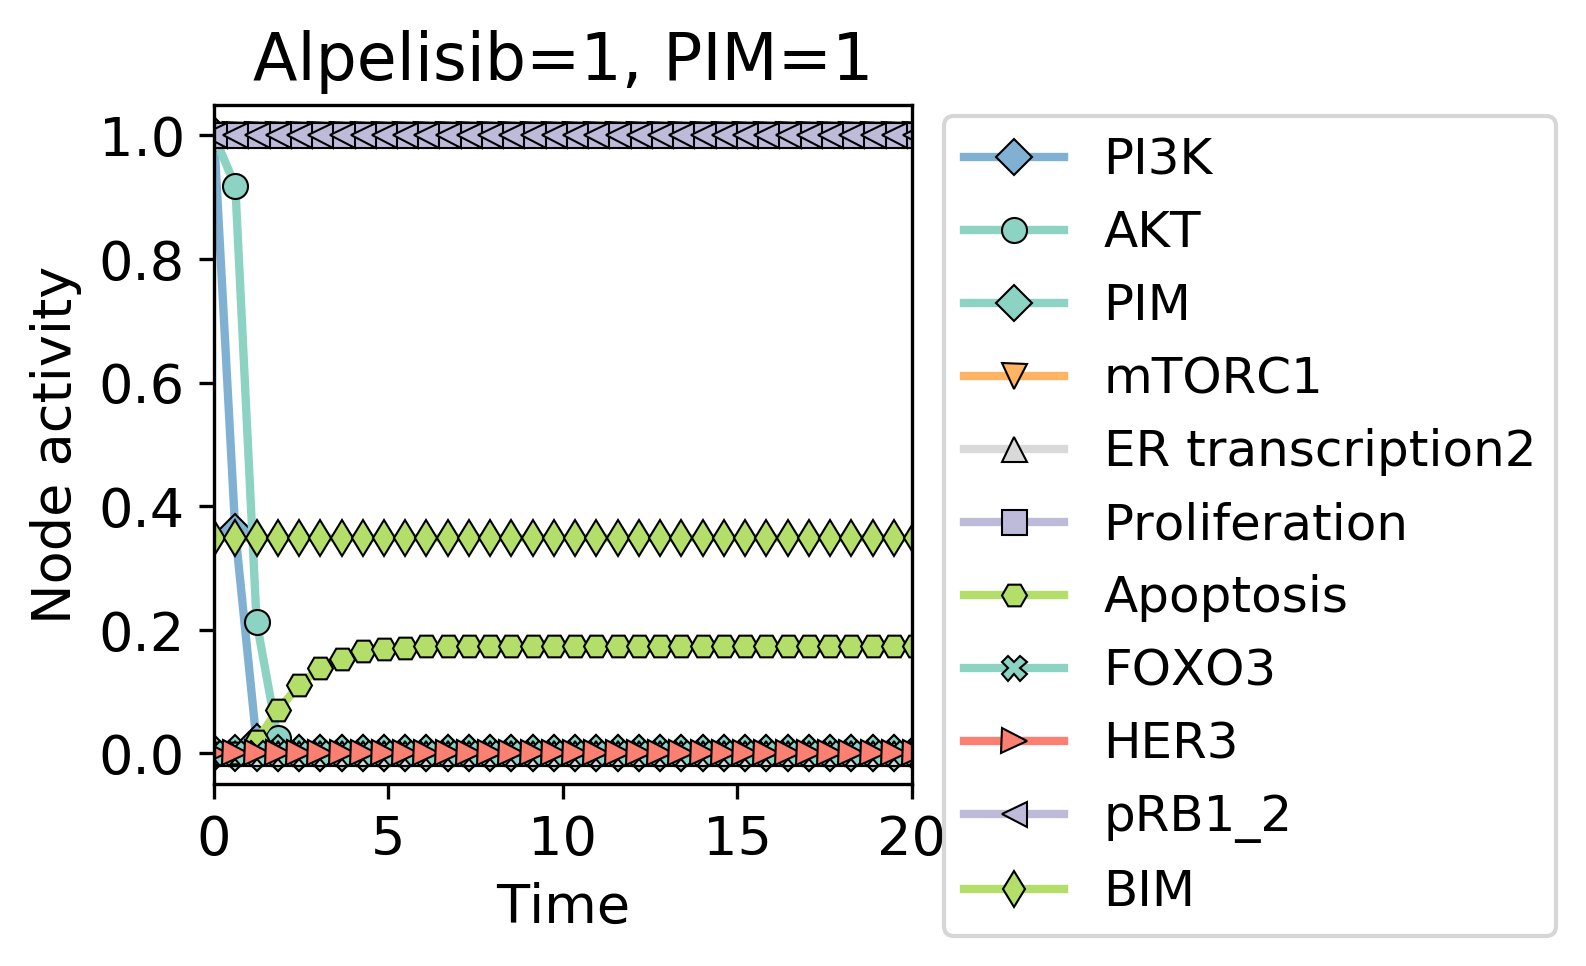

In [36]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_PIM_1'
df_plot=df_timecourse_alpelisib_1_SGK1_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='PIM', marker='D',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT',"PIM",'mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, PIM=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png")

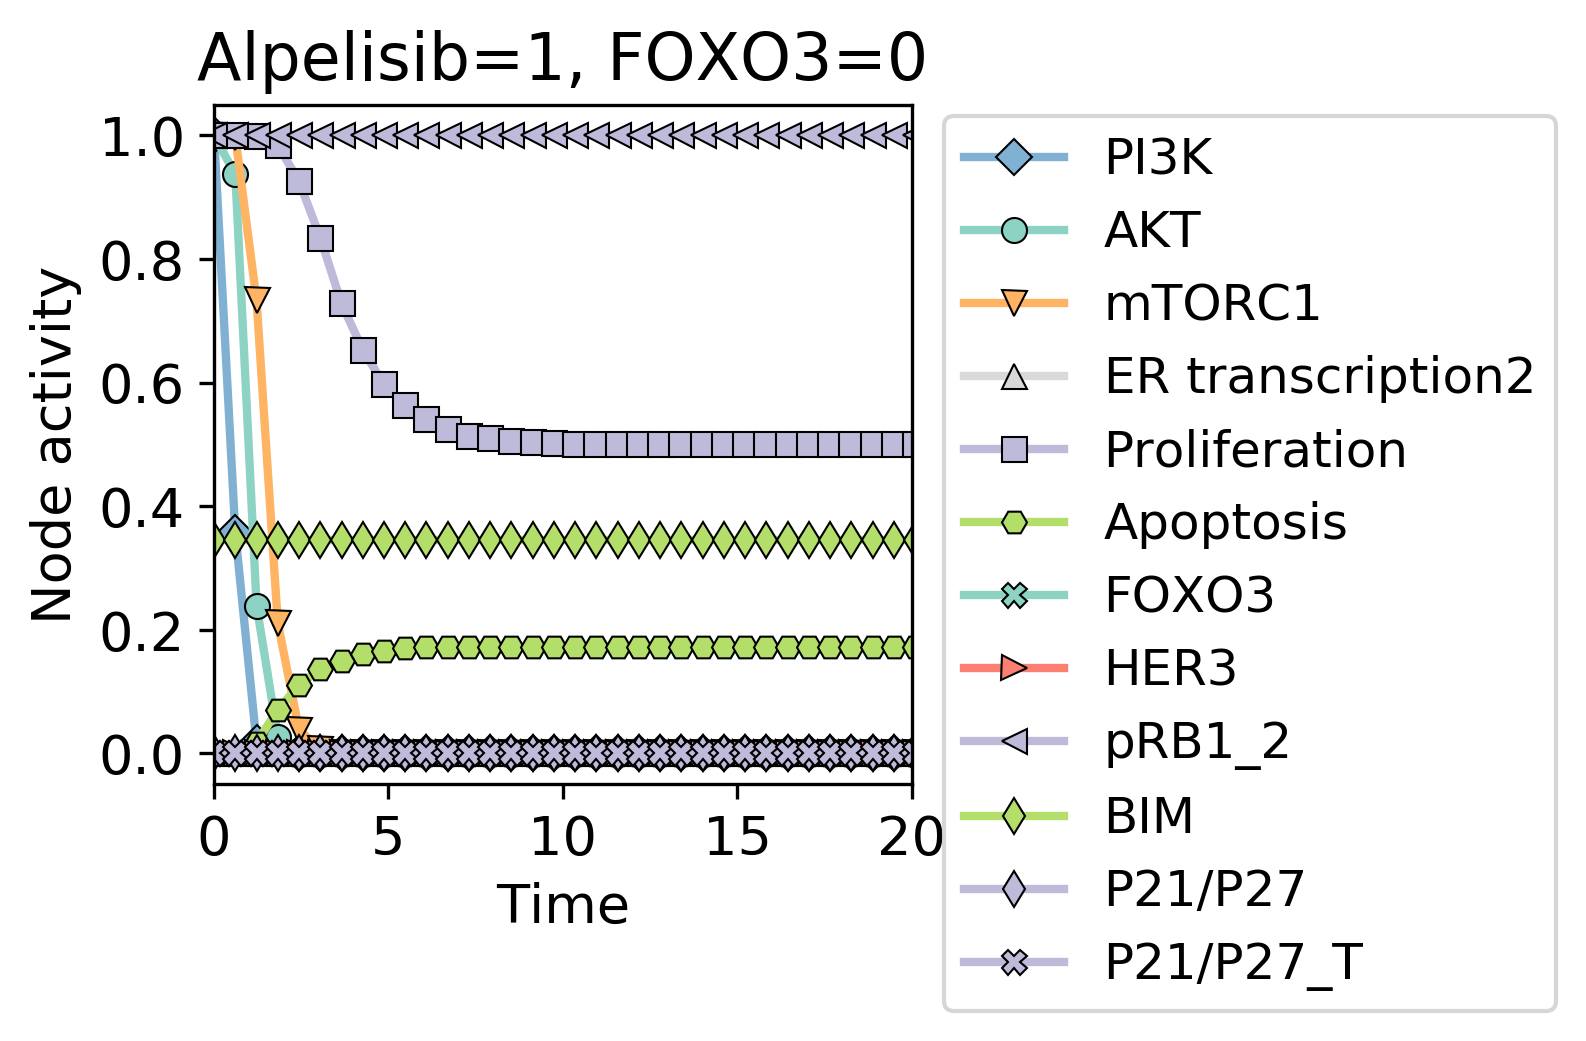

In [37]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_FOXO3_0'
df_plot=df_timecourse_alpelisib_1_foxo3_0.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='p21_p27',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='p21_p27_T',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","P21/P27","P21/P27_T"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, FOXO3=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

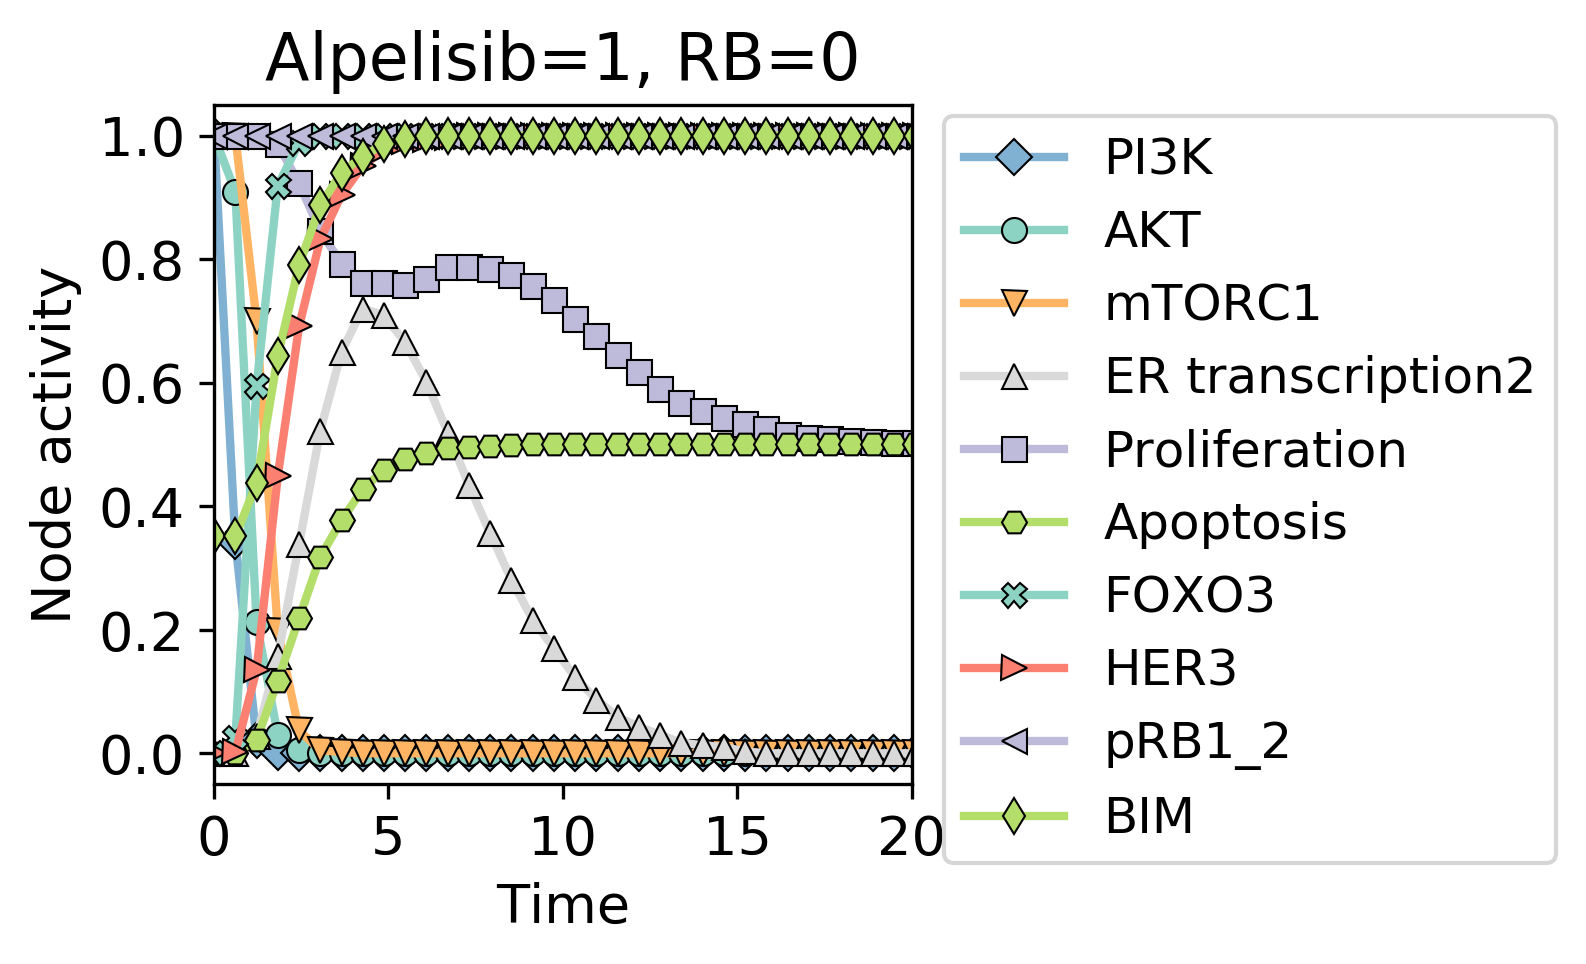

In [38]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_pRb2_1'
df_plot=df_timecourse_alpelisib_1_pRb2_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, RB=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

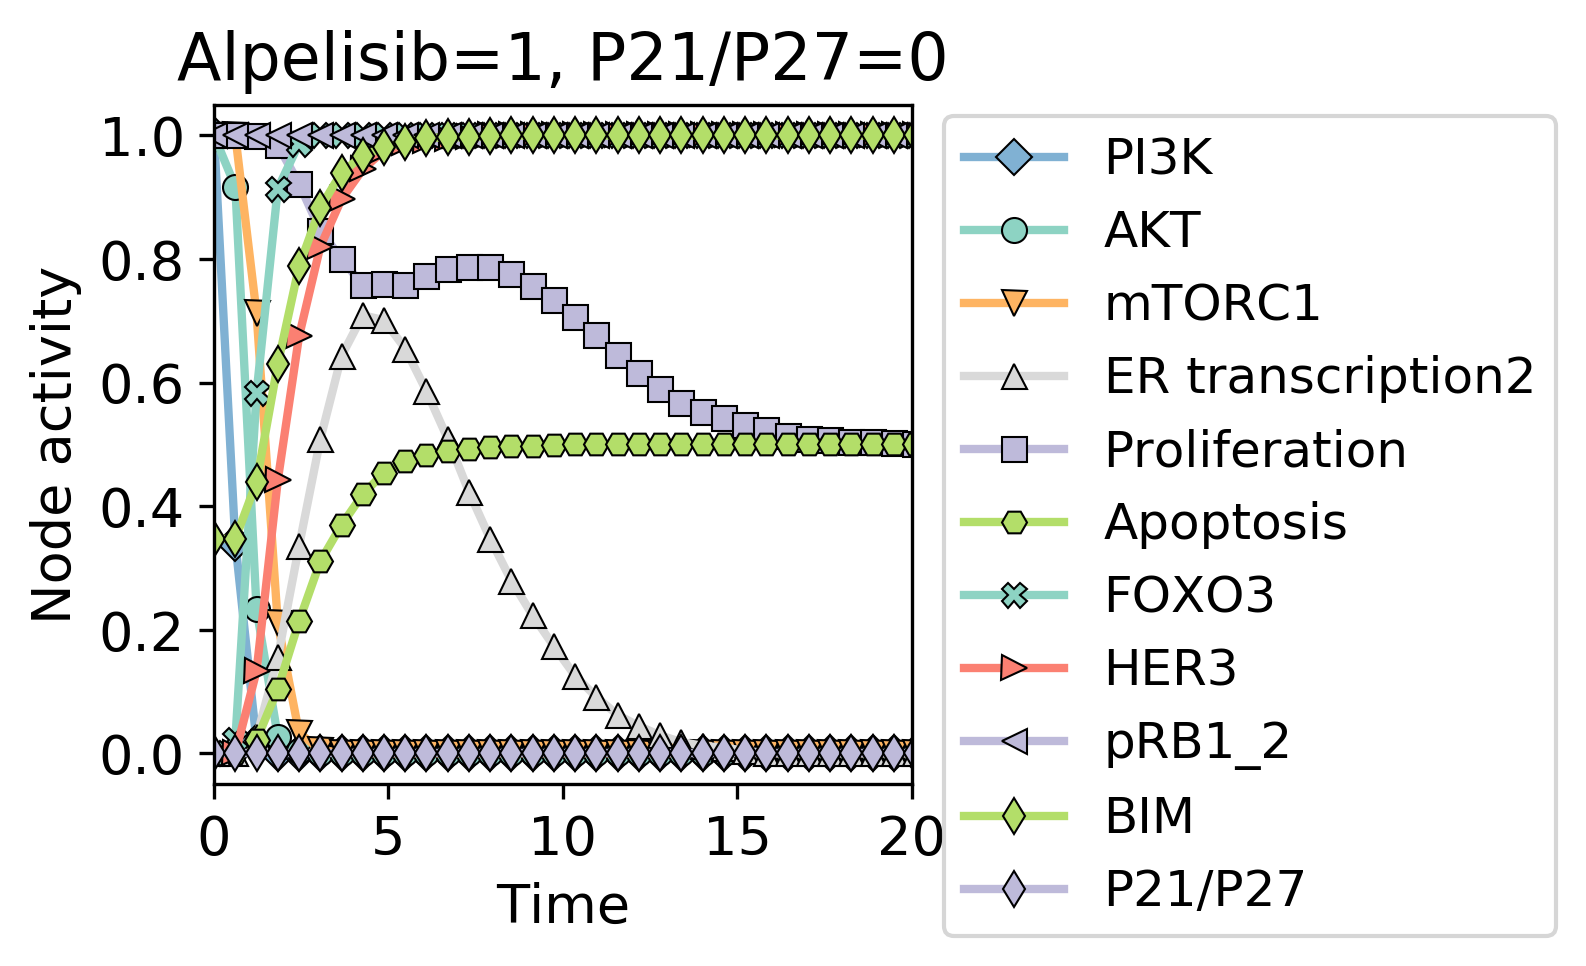

In [39]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_P21P27_0'
df_plot=df_timecourse_alpelisib_1_P21P27_0.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='p21_p27',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","P21/P27"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, P21/P27=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png")

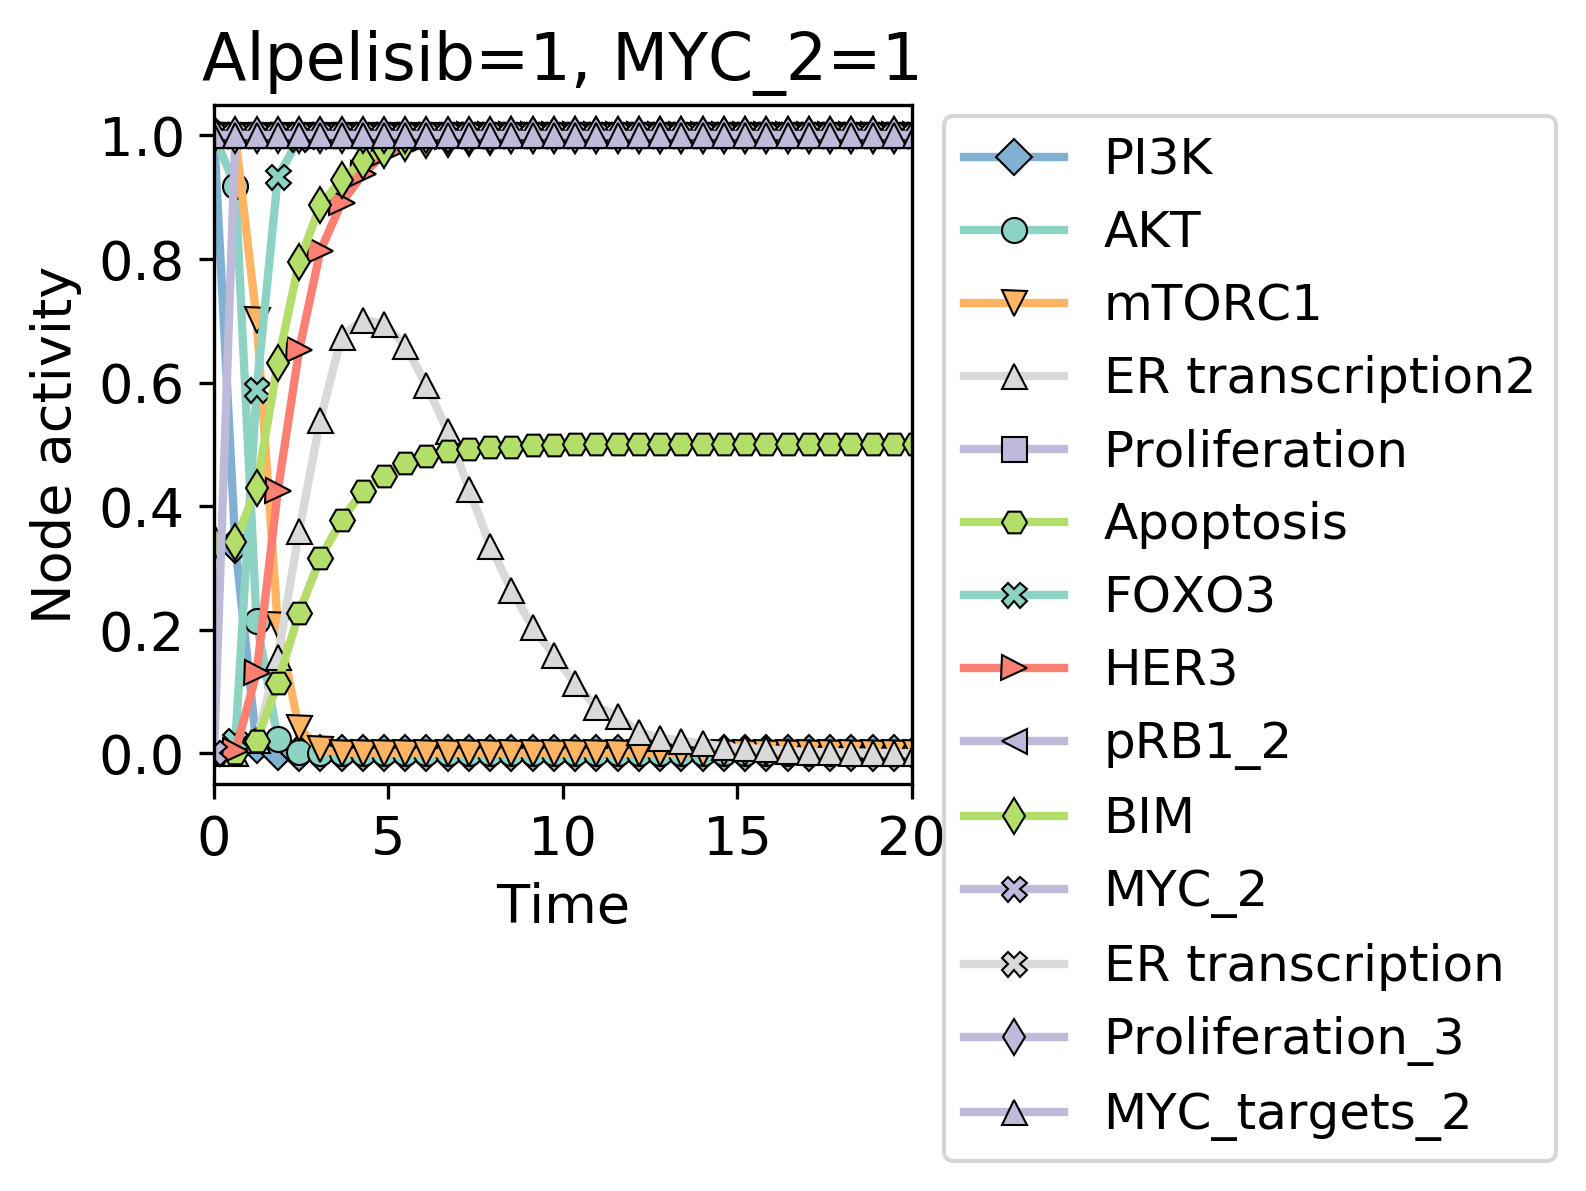

In [40]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_MYC2_1'
df_plot=df_timecourse_alpelisib_1_MYC2_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_2',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription',marker='X',linestyle='-',c="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_3',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_targets_2',marker='^',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","MYC_2","ER transcription","Proliferation_3","MYC_targets_2"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, MYC_2=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

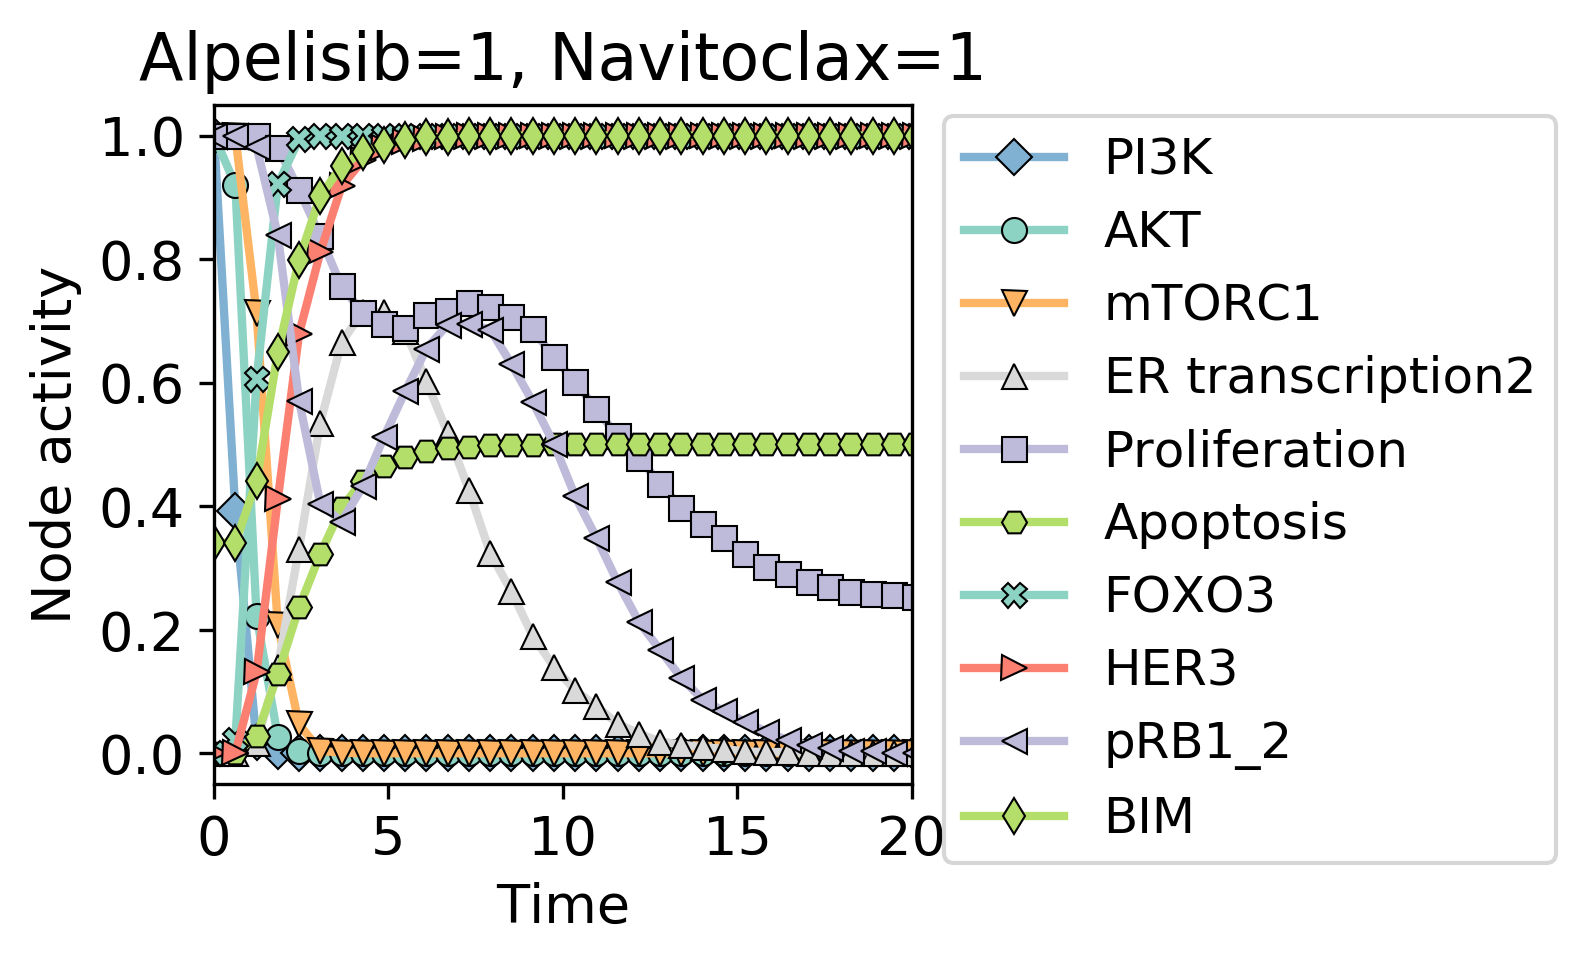

In [41]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_Navitoclax_1'
df_plot=df_timecourse_alpelisib_1_Navitoclax_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, Navitoclax=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

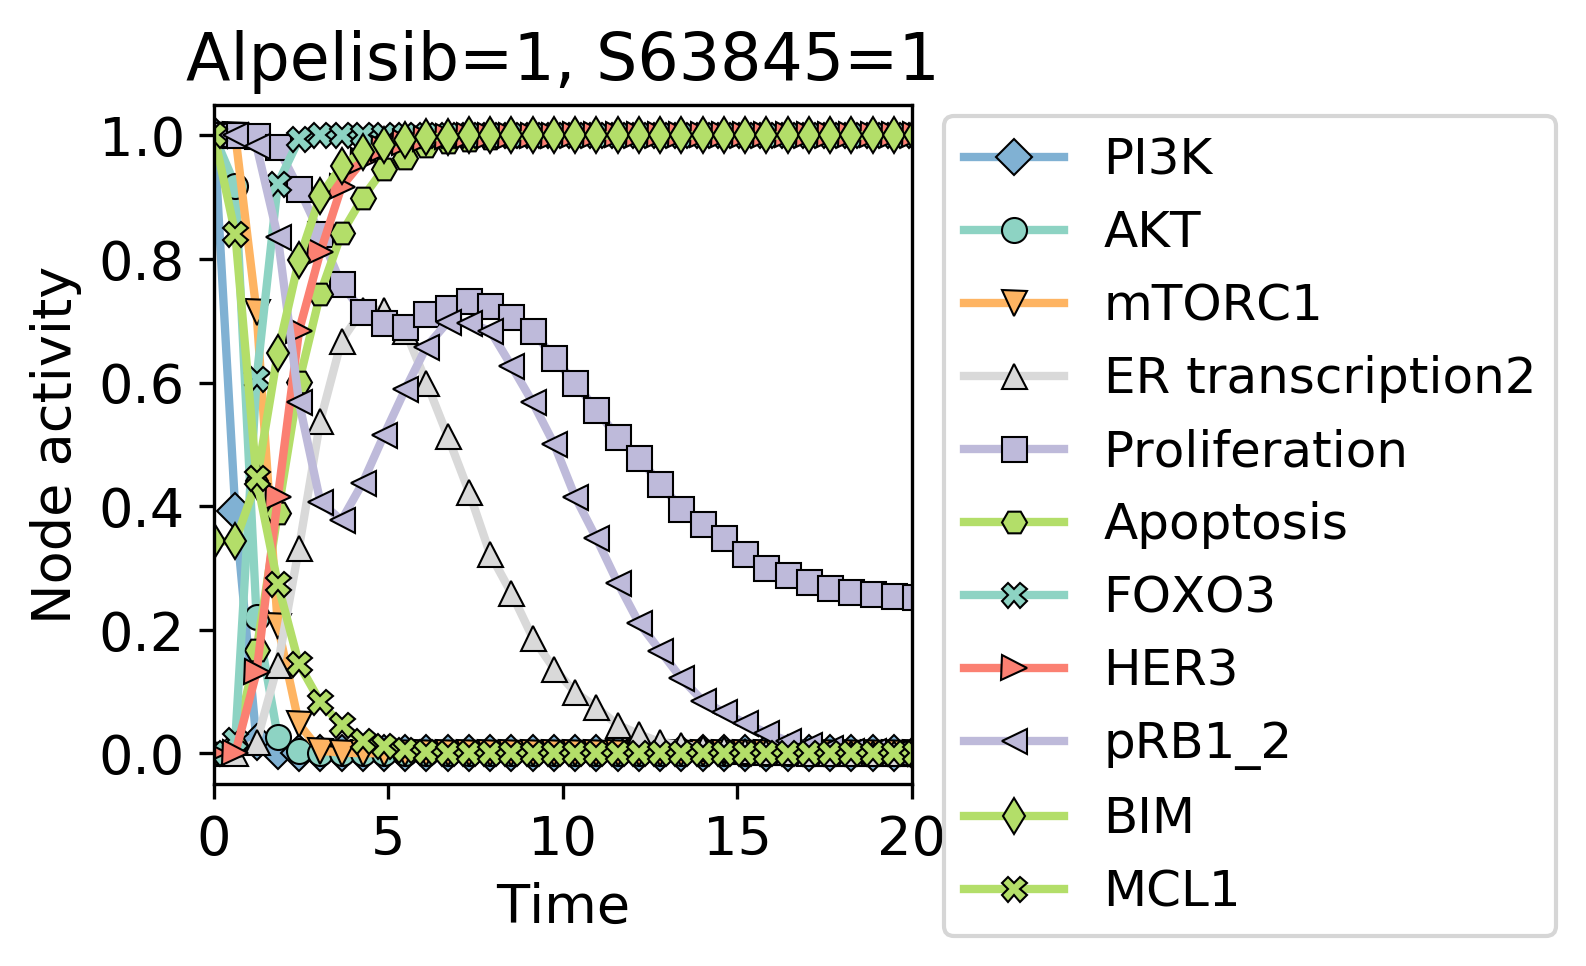

In [42]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_S63845_1'
df_plot=df_timecourse_alpelisib_1_S63845_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MCL1',marker='X',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","MCL1"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, S63845=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

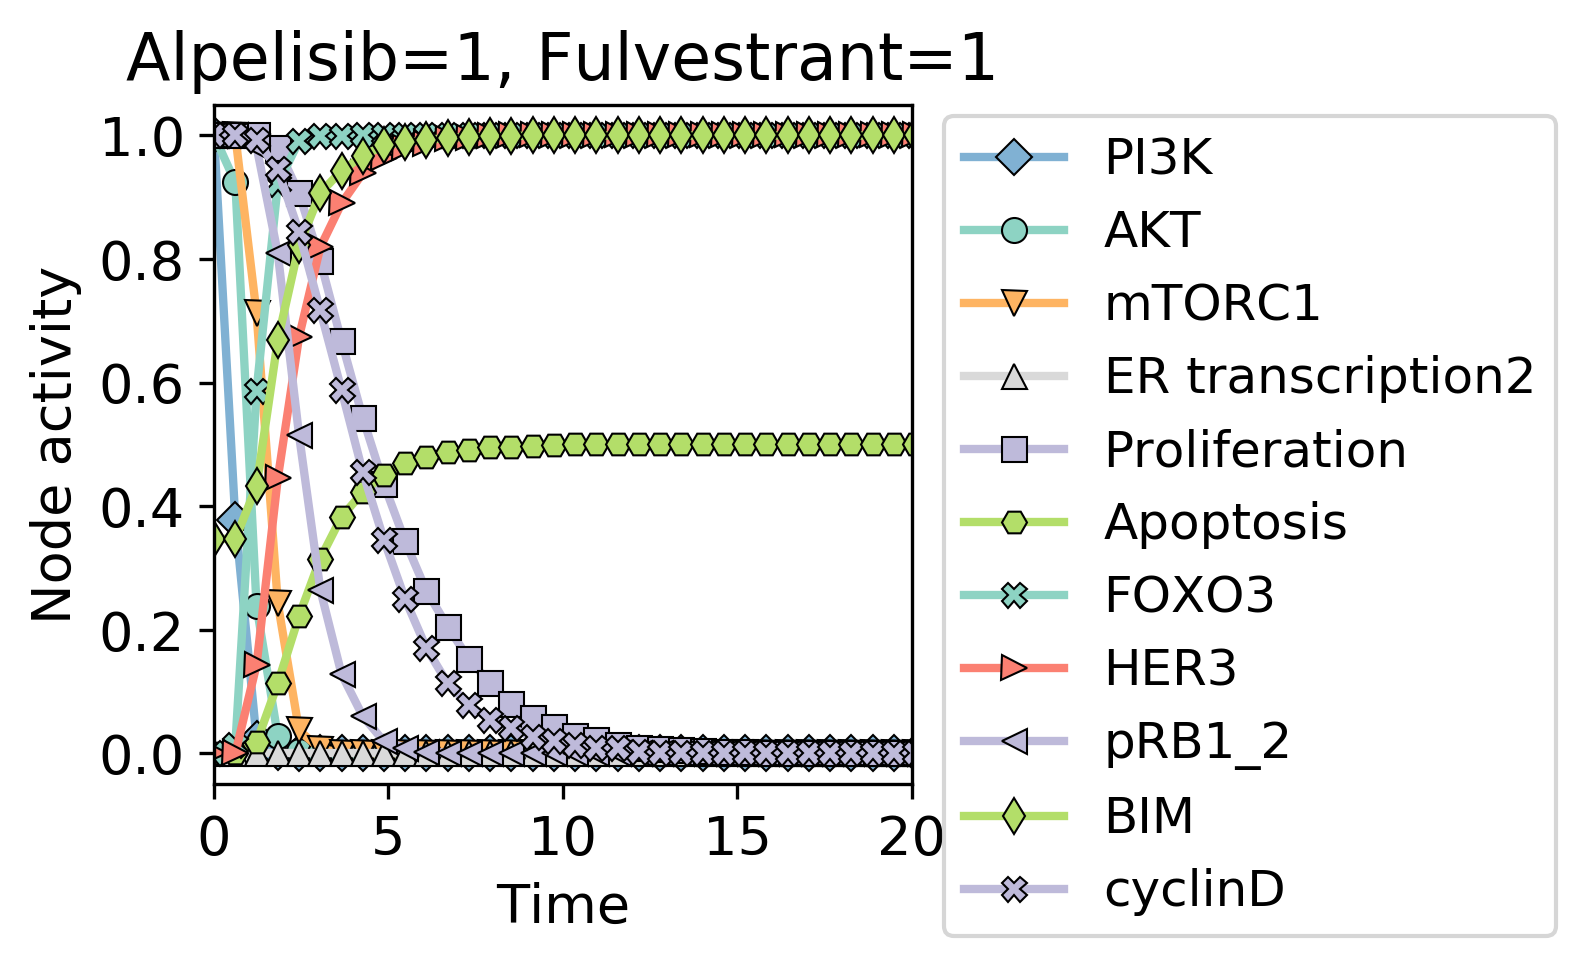

In [43]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_Fulvestrant_1'
df_plot=df_timecourse_alpelisib_1_fulvestrant_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='cyclinD',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","cyclinD"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, Fulvestrant=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

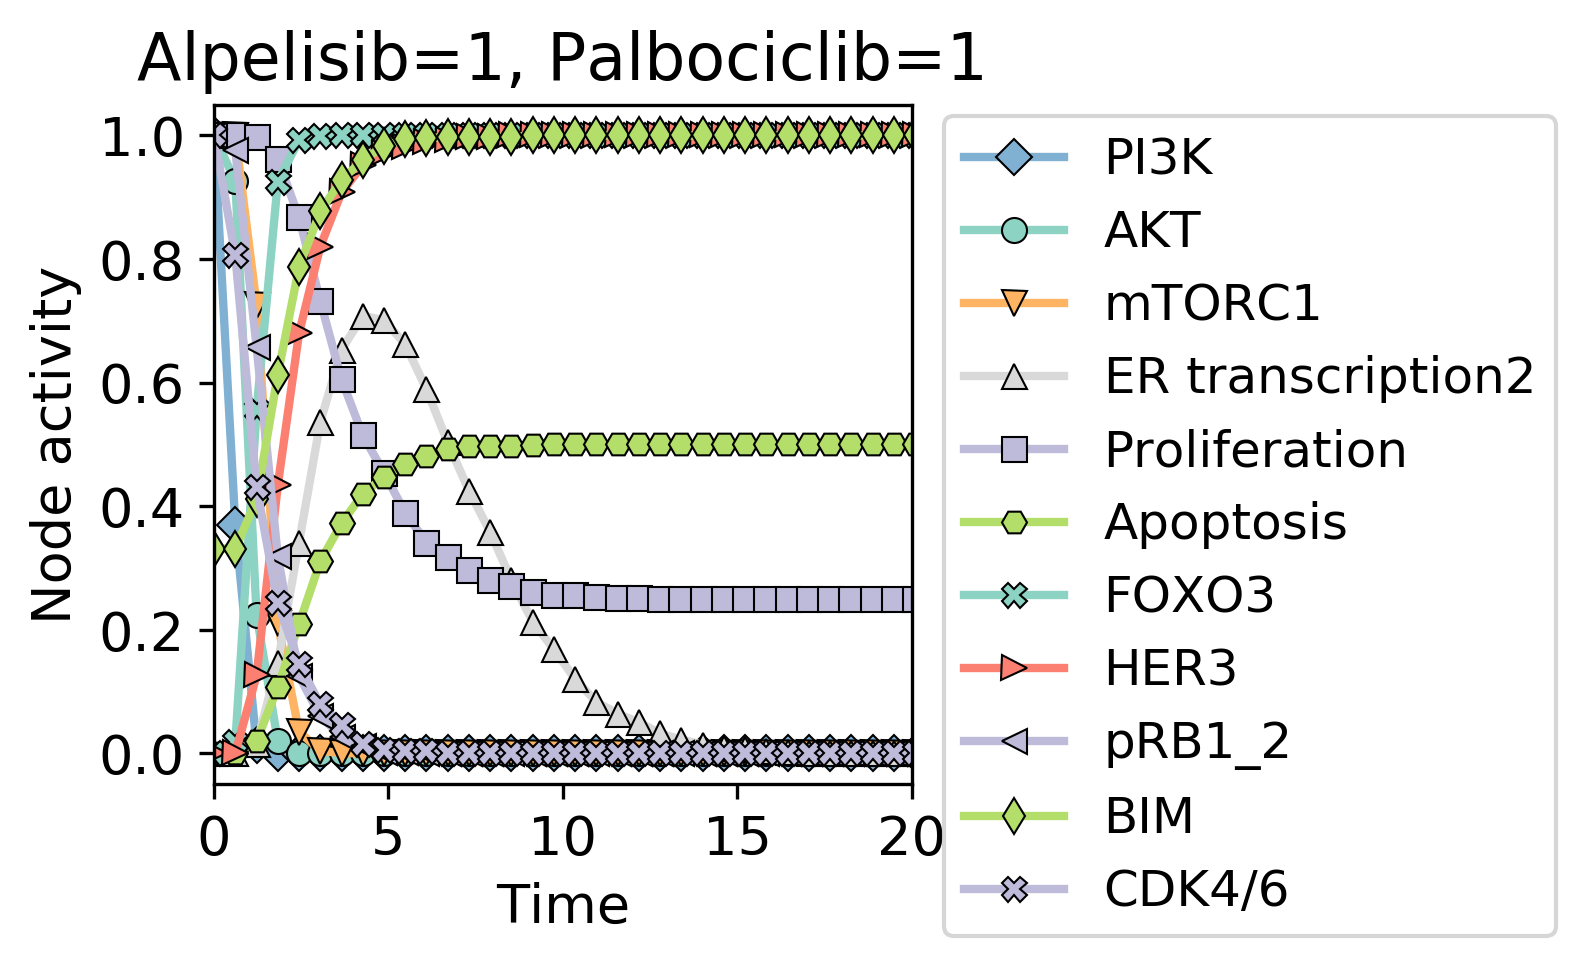

In [44]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_Palbociclib_1'
df_plot=df_timecourse_alpelisib_1_palbociclib_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='CDK46',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","CDK4/6"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, Palbociclib=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

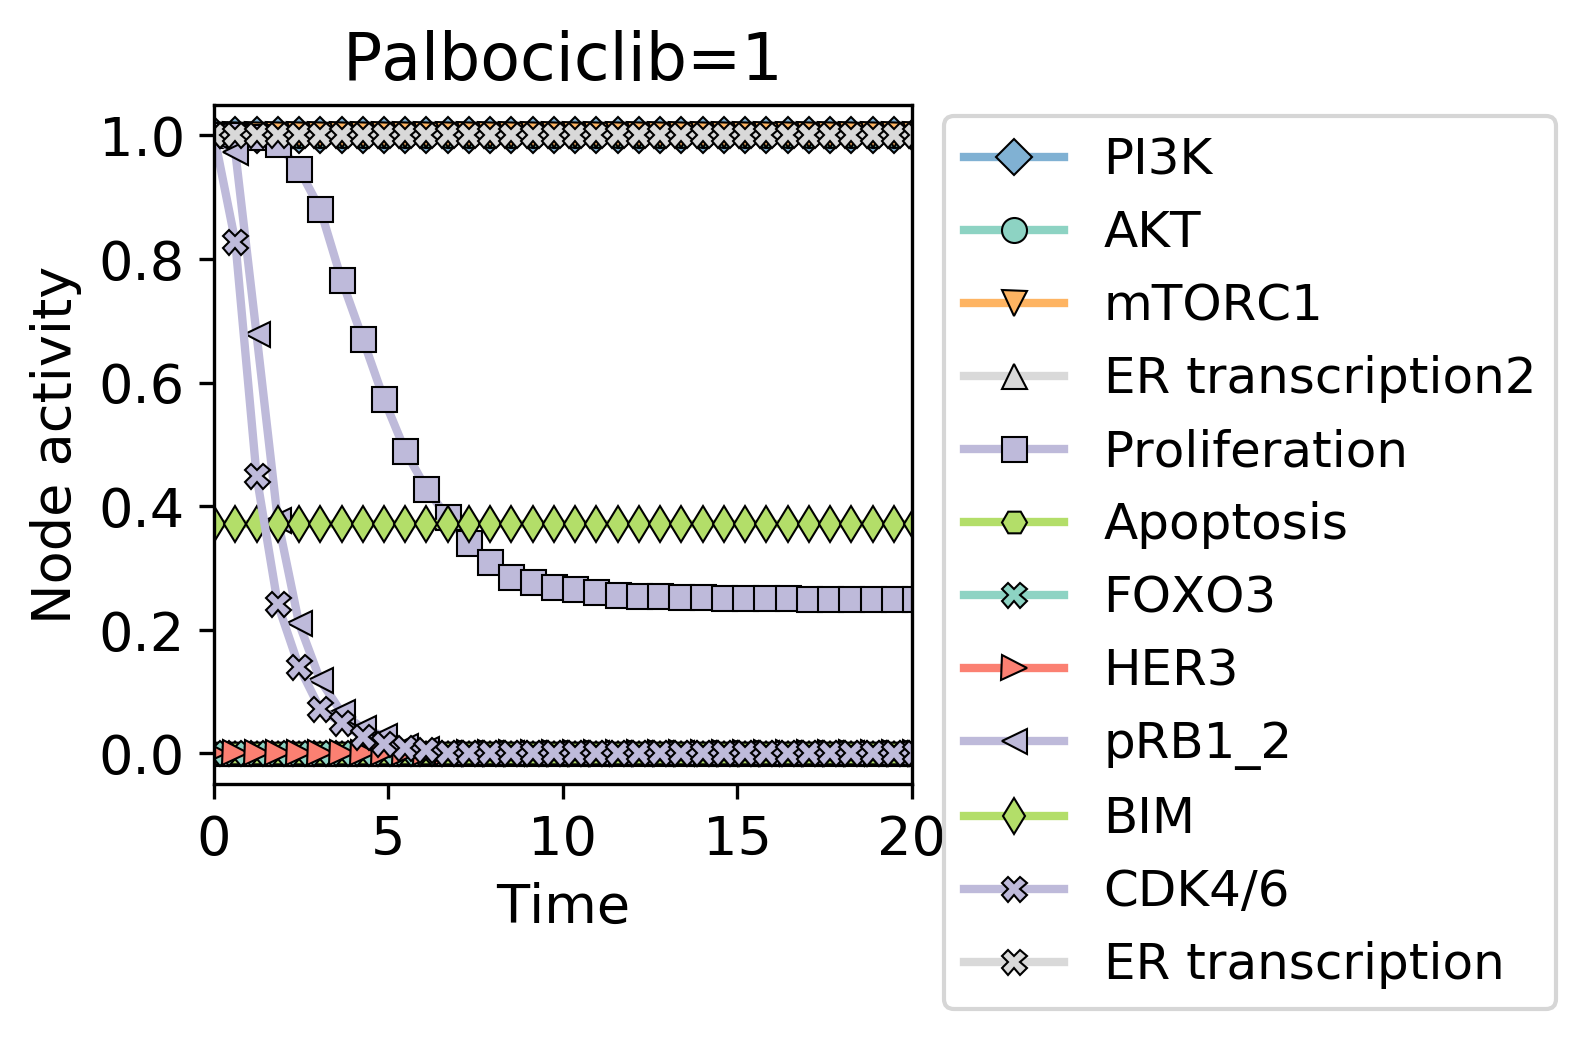

In [45]:
filename='figures/BreastCancerModel_Mod0420_Palbociclib_1'
df_plot=df_timecourse_palbociclib_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='CDK46',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription',marker='X',linestyle='-',c="#d9d9d9",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","CDK4/6","ER transcription"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Palbociclib=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

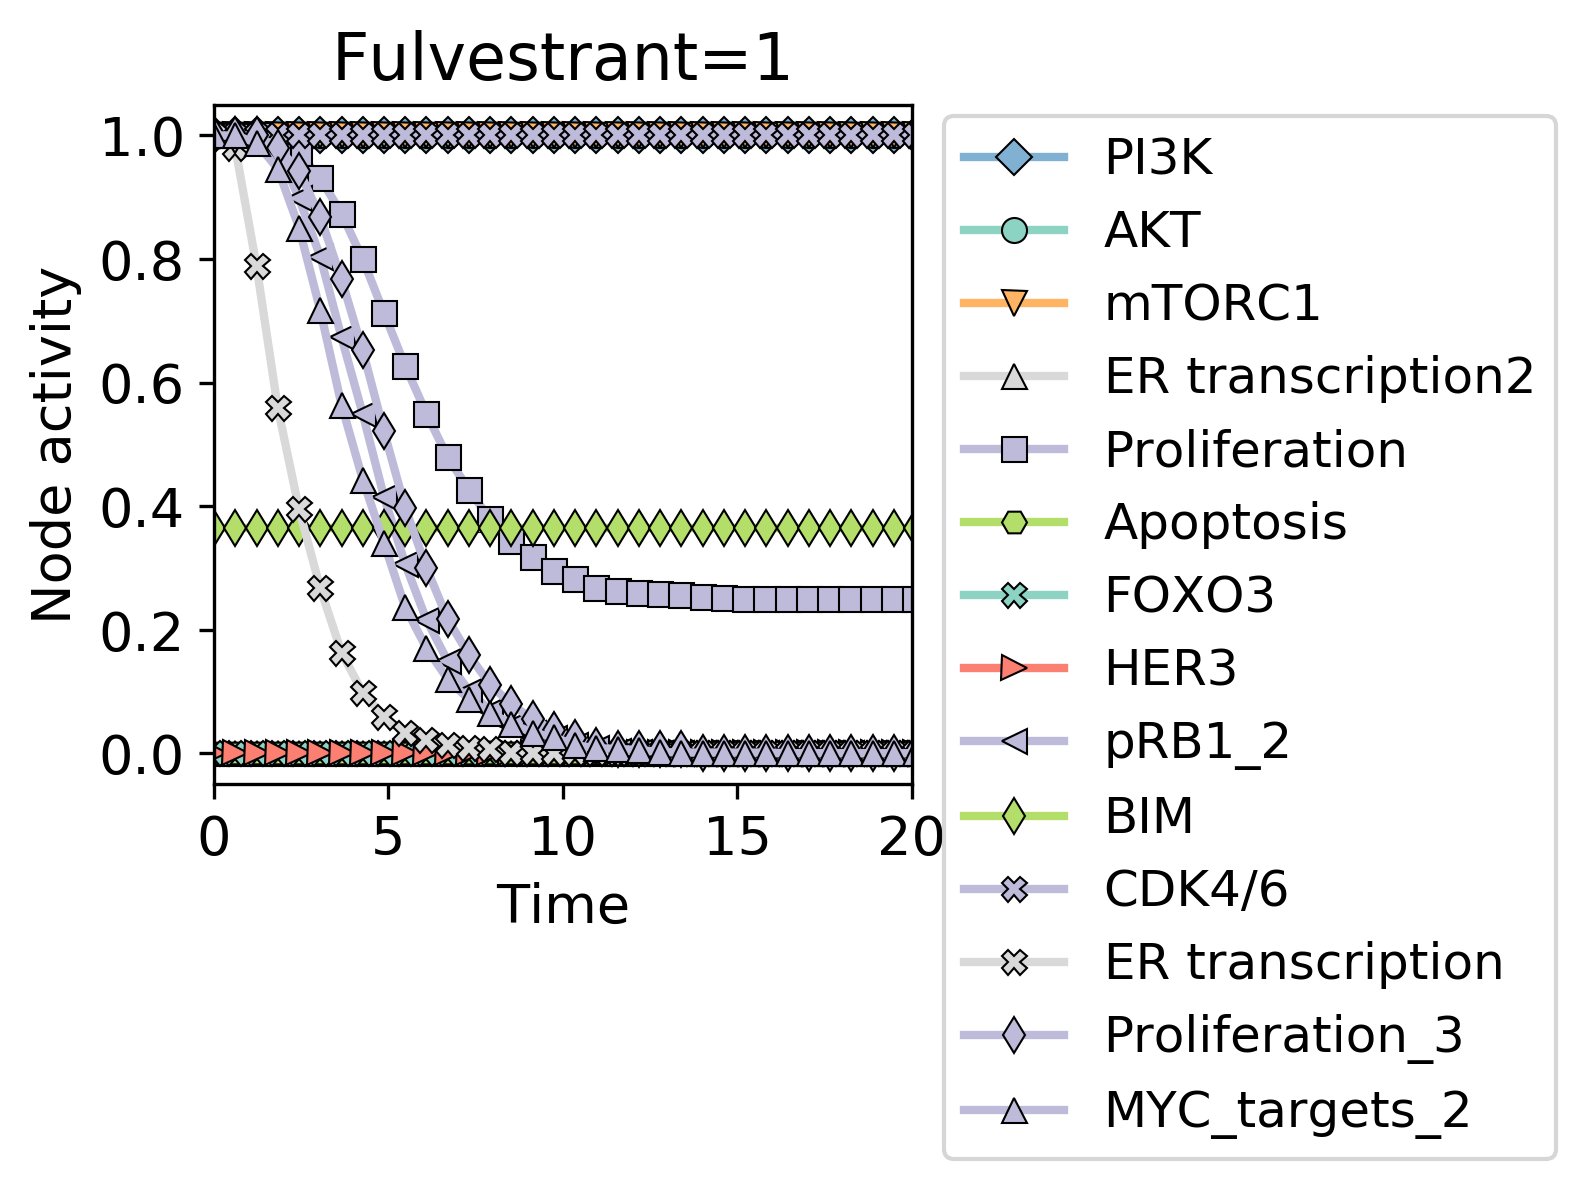

In [46]:
filename='figures/BreastCancerModel_Mod0420_Fulvestrant_1'
df_plot=df_timecourse_fulvestrant_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='CDK46',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription',marker='X',linestyle='-',c="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_3',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_targets_2',marker='^',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","CDK4/6","ER transcription","Proliferation_3","MYC_targets_2"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Fulvestrant=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

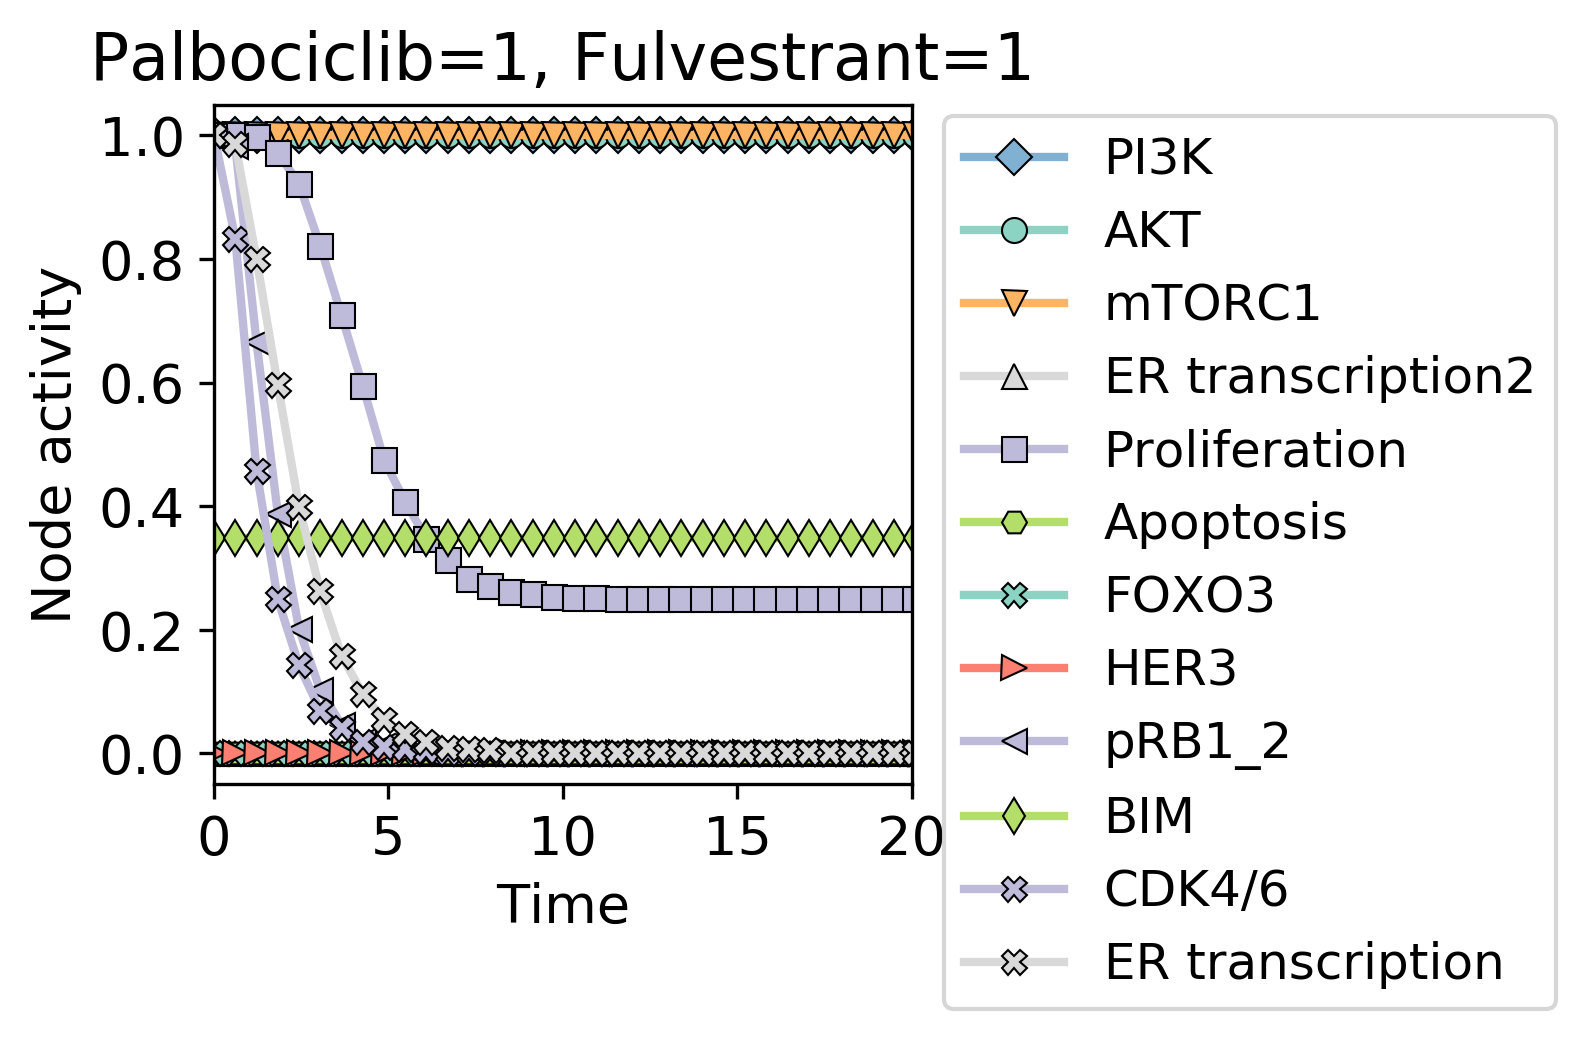

In [47]:
filename='figures/BreastCancerModel_Mod0420_Palbociclib_1_Fulvestrant_1'
df_plot=df_timecourse_palbociclib_1_fulvestrant_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='CDK46',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription',marker='X',linestyle='-',c="#d9d9d9",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","CDK4/6","ER transcription"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Palbociclib=1, Fulvestrant=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

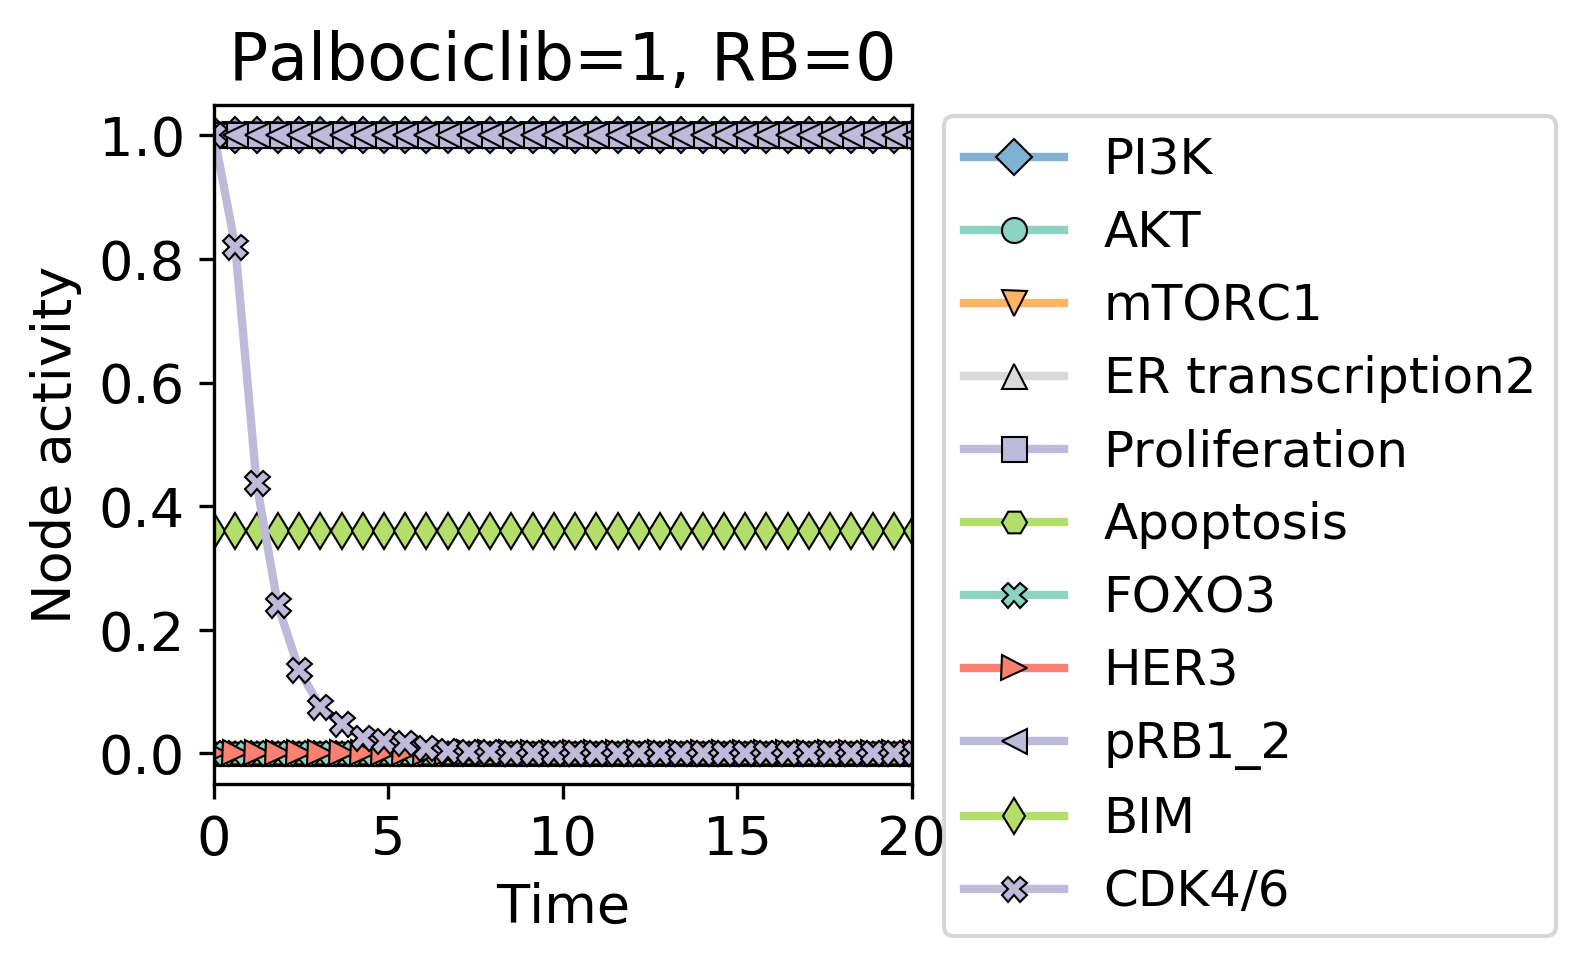

In [48]:
filename='figures/BreastCancerModel_Mod0420_Palbociclib_1_pRb2_1'
df_plot=df_timecourse_palbociclib_1_pRb2_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='CDK46',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","CDK4/6"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Palbociclib=1, RB=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

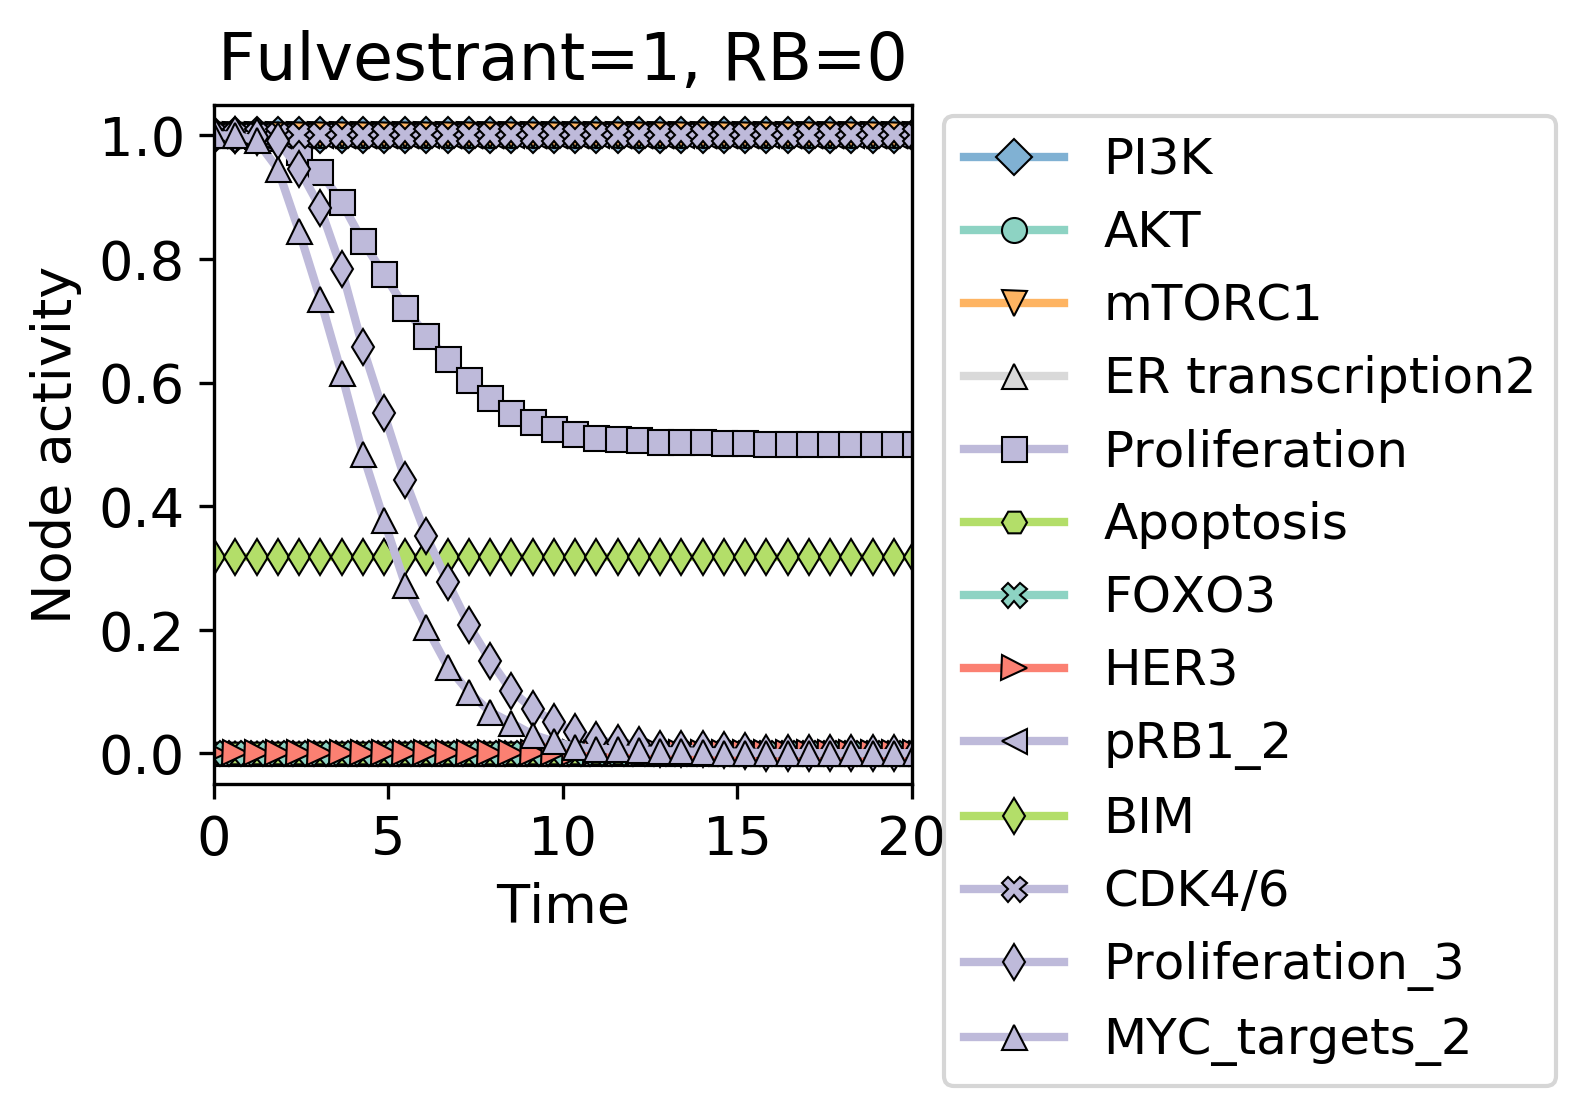

In [49]:
filename='figures/BreastCancerModel_Mod0420_Fulvestrant_1_pRb2_1'
df_plot=df_timecourse_fulvestrant_1_pRb2_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='CDK46',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_3',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_targets_2',marker='^',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","CDK4/6","Proliferation_3","MYC_targets_2"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Fulvestrant=1, RB=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

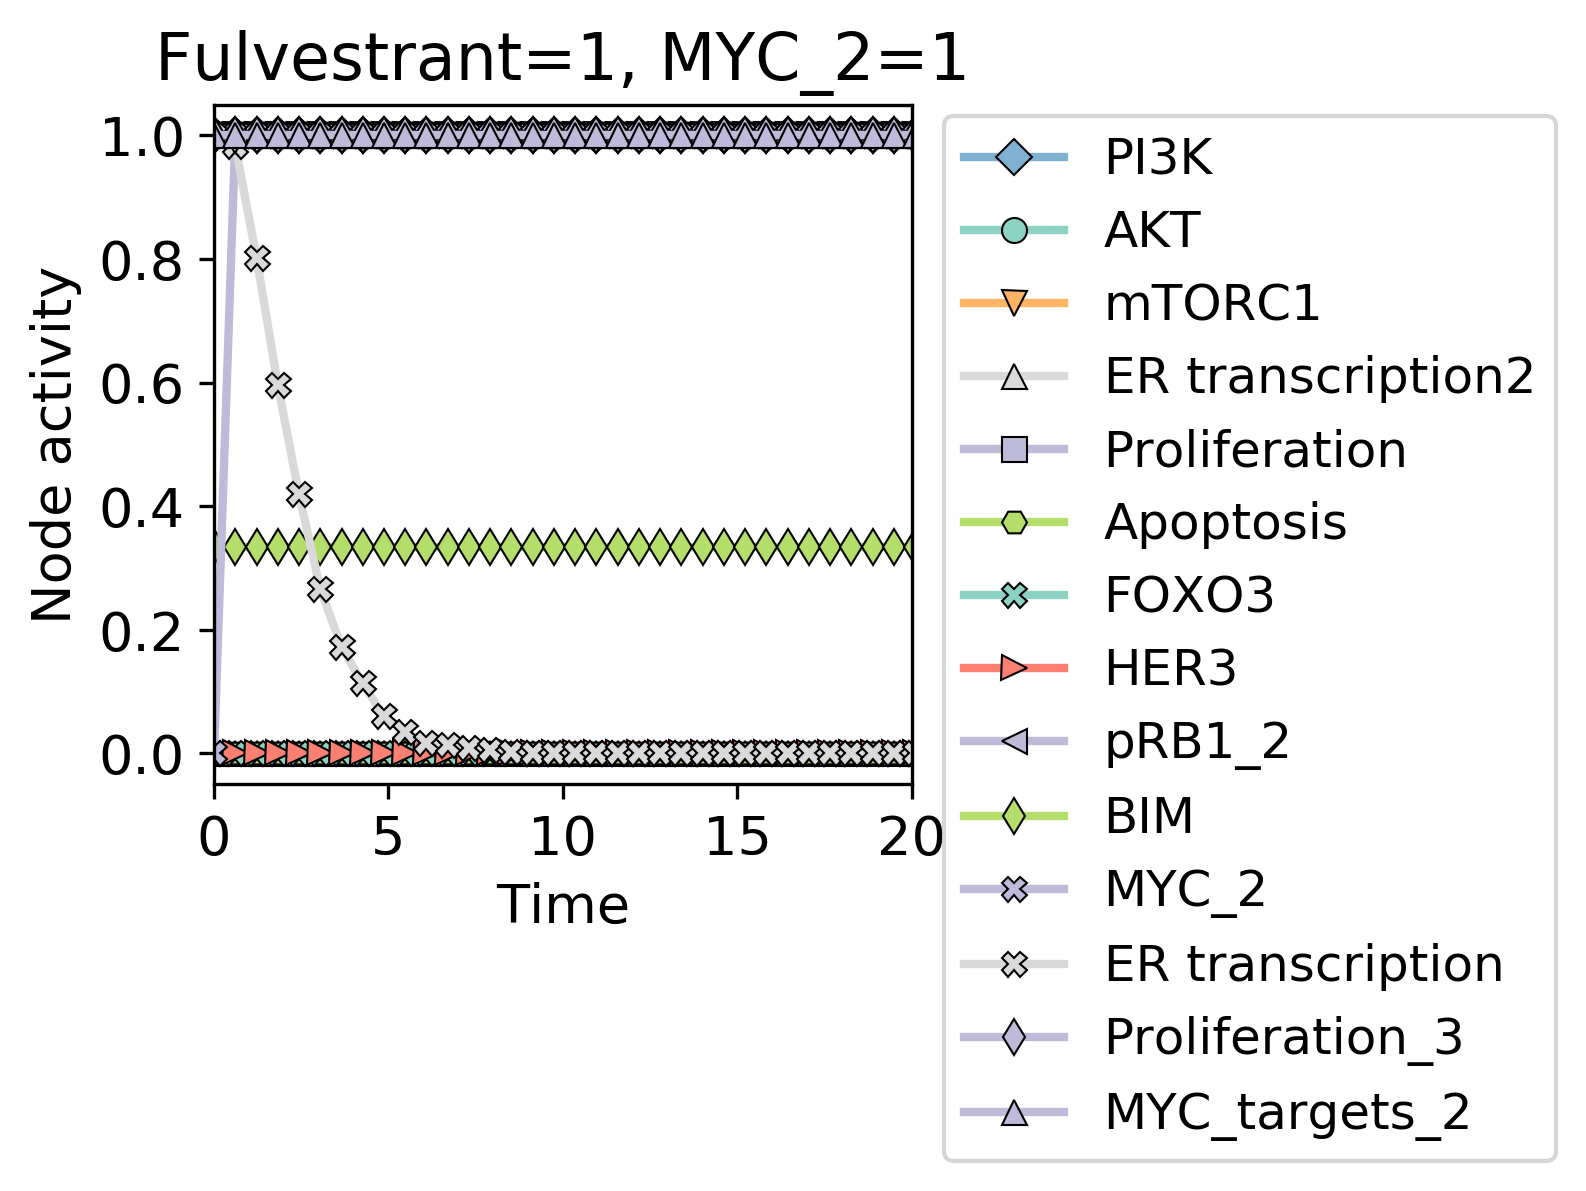

In [50]:
filename='figures/BreastCancerModel_Mod0420_Fulvestrant_1_MYC2_1'
df_plot=df_timecourse_fulvestrant_1_MYC2_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_2',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription',marker='X',linestyle='-',c="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_3',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_targets_2',marker='^',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","MYC_2","ER transcription","Proliferation_3","MYC_targets_2"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Fulvestrant=1, MYC_2=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

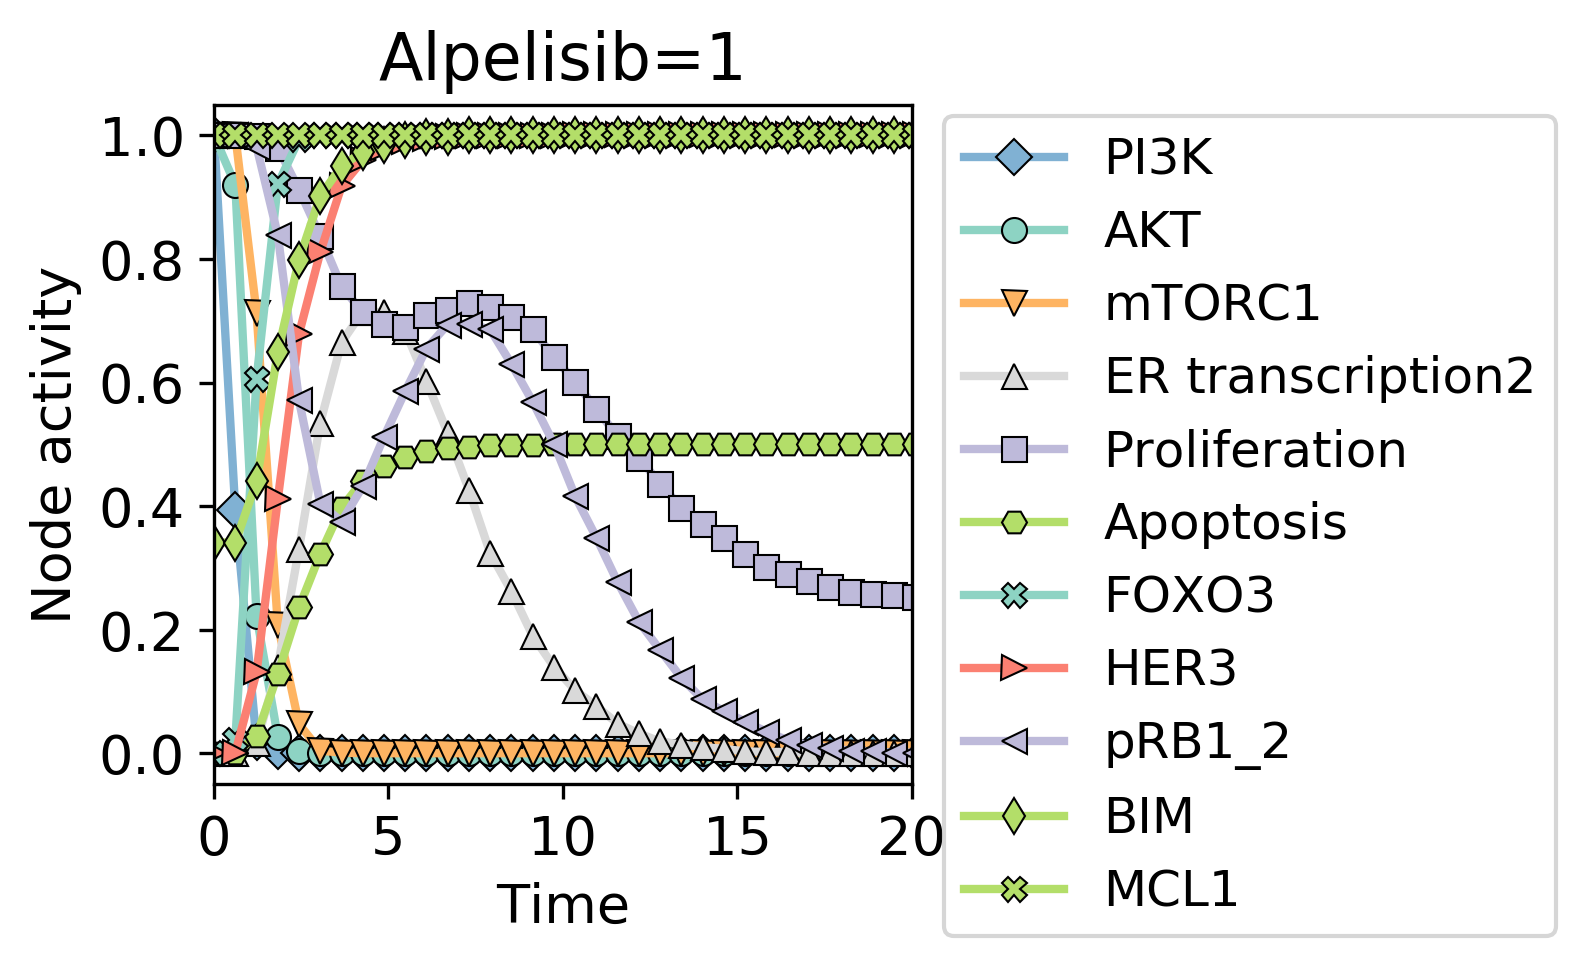

In [51]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MCL1',marker='X',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","MCL1"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'-v2.svg', bbox_inches='tight',dpi=450)
savefig(filename+'-v2.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+"-v2.png")

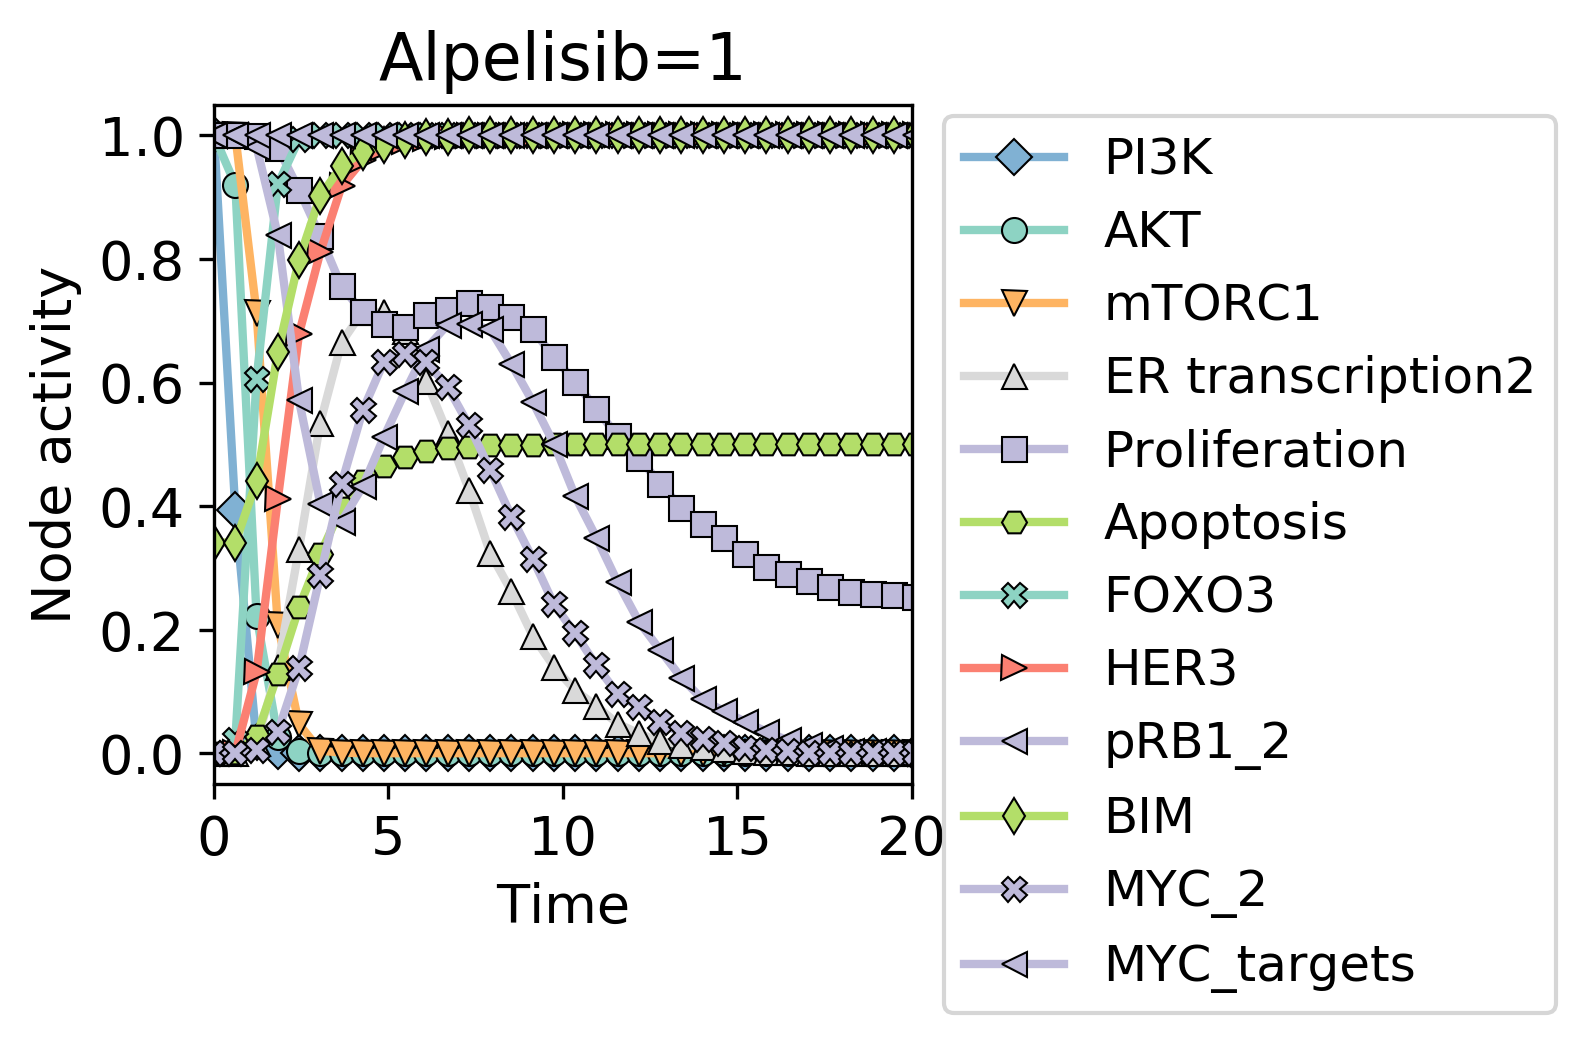

In [52]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_2',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_targets',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","MYC_2","MYC_targets"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'-v3.svg', bbox_inches='tight',dpi=450)
savefig(filename+'-v3.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+"-v3.png")

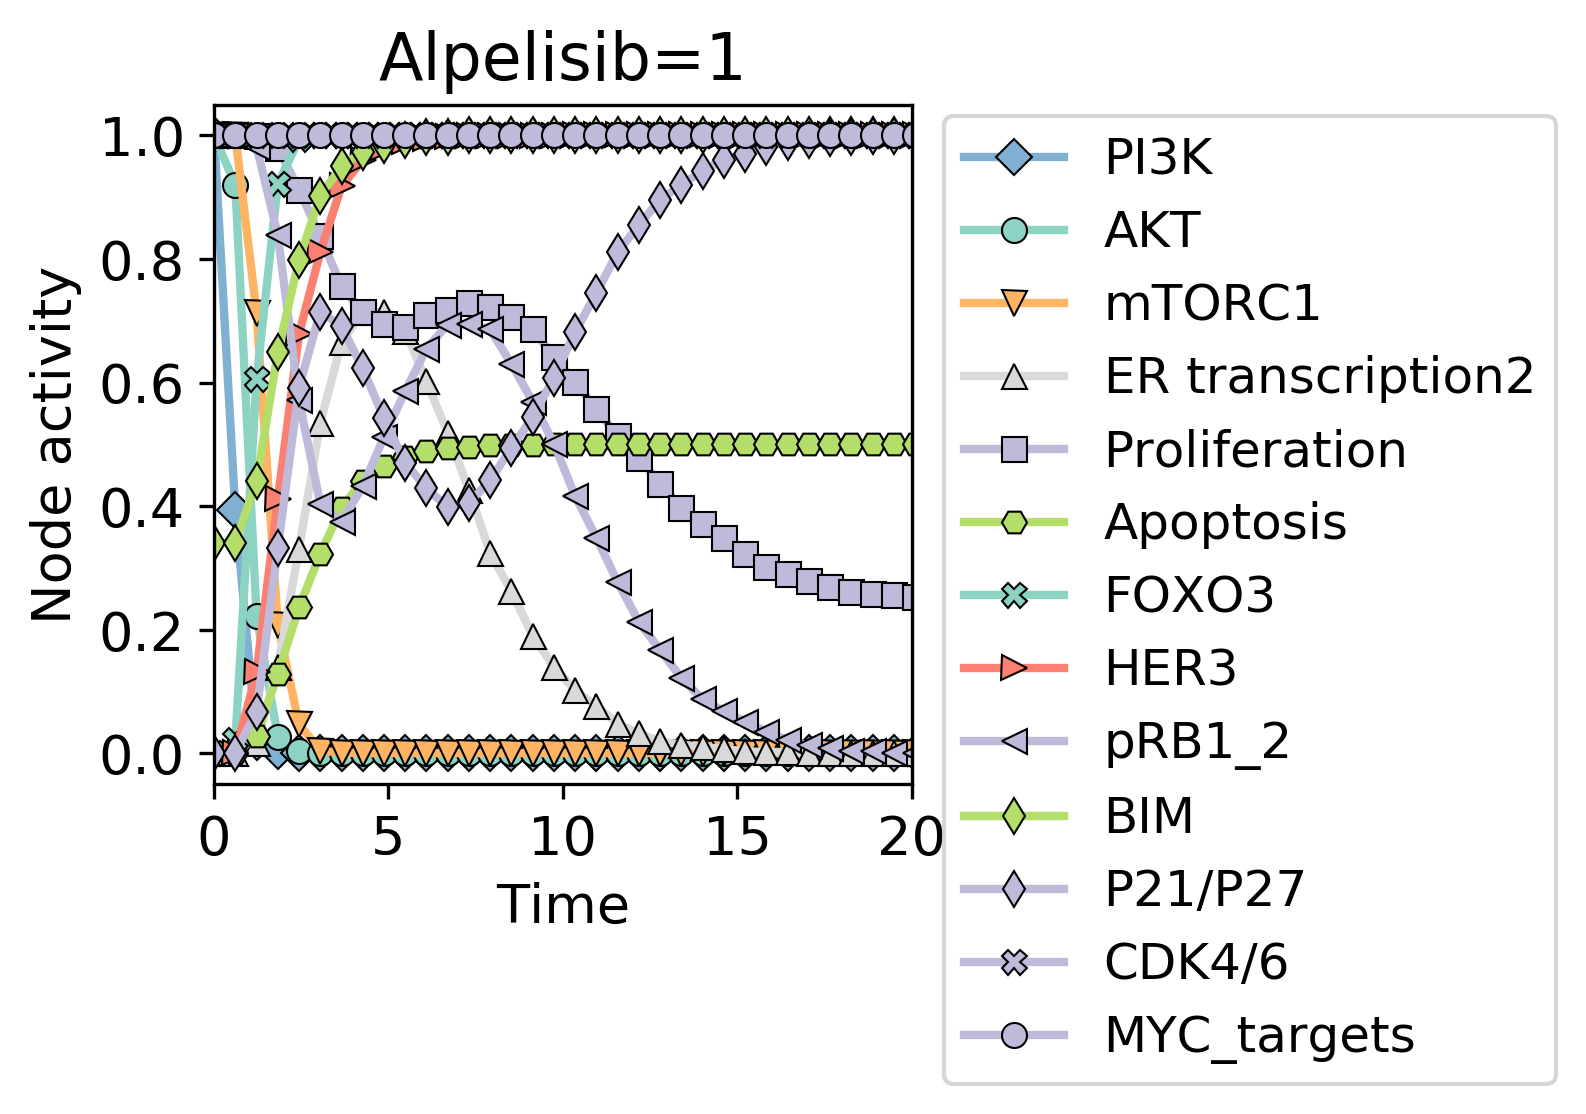

In [53]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='p21_p27',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='CDK46',marker='X',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='MYC_targets',marker='o',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)

plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","P21/P27","CDK4/6","MYC_targets"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'-v4.svg', bbox_inches='tight',dpi=450)
savefig(filename+'-v4.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+"-v4.png")

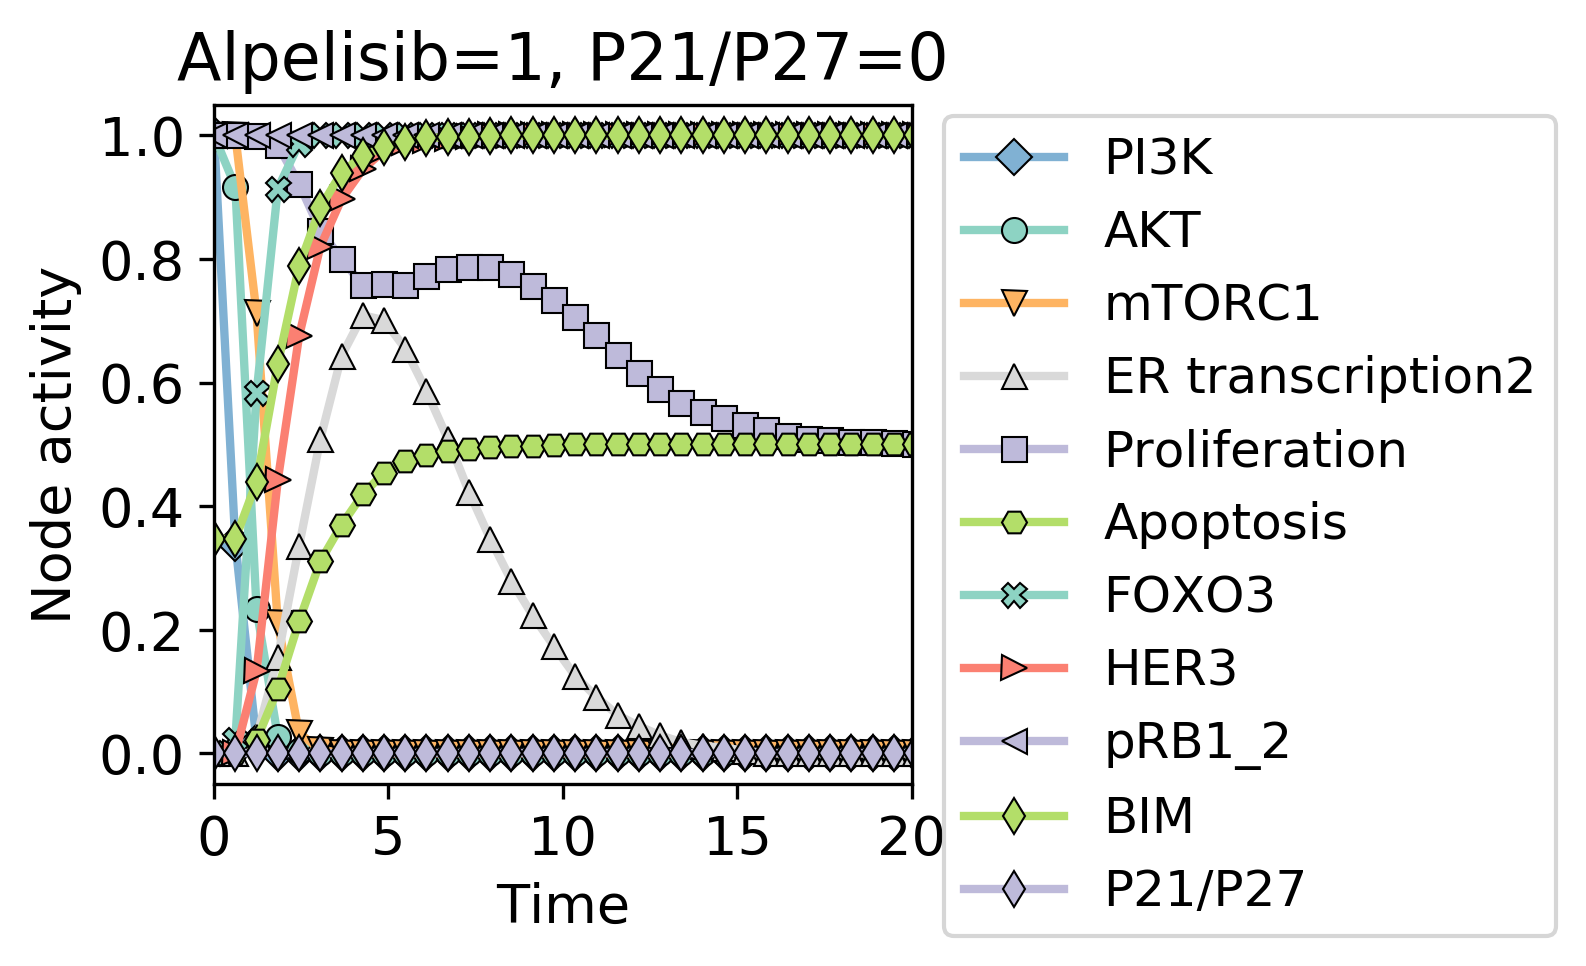

In [54]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1_P21P27_0'
df_plot=df_timecourse_alpelisib_1_P21P27_0.iloc[::3, :]
ax = plt.gca()
df_plot.plot(kind='line',x='time',y='PI3K', marker='D',linestyle='-',c="#80b1d3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='AKT', marker='o',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='HER3',marker='>',linestyle='-',c="#fb8072ff",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='p21_p27',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
plt.legend(['PI3K','AKT','mTORC1',"ER transcription2",'Proliferation','Apoptosis',"FOXO3","HER3","pRB1_2","BIM","P21/P27"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, P21/P27=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'-v4.svg', bbox_inches='tight',dpi=450)
savefig(filename+'-v4.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png")

# Plots of timecourses of selected different nodes in Alpelisib vs Alpelisib+perturbation

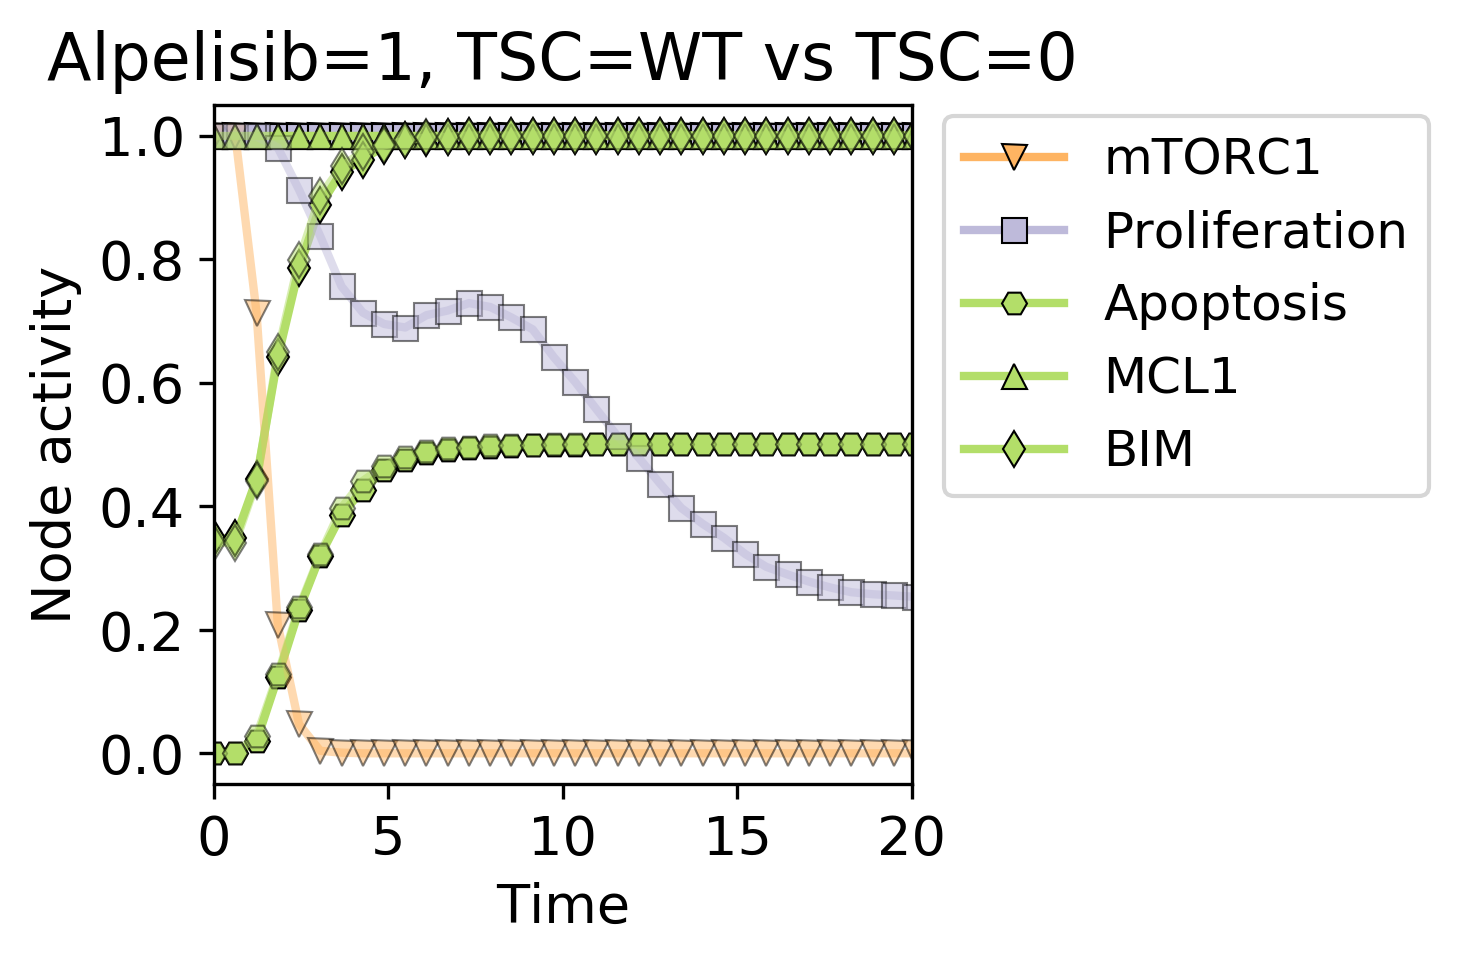

In [55]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1-vs-Alpelisib_1_TSC_0'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
df_plot2=df_timecourse_alpelisib_1_TSC_0.iloc[::3, :]
ax = plt.gca()
df_plot2.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='MCL1',marker='^',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='mTORC1',marker='v',linestyle='-',color="#feb462",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='MCL1',marker='^',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
plt.legend(["mTORC1",'Proliferation','Apoptosis',"MCL1","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, TSC=WT vs TSC=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

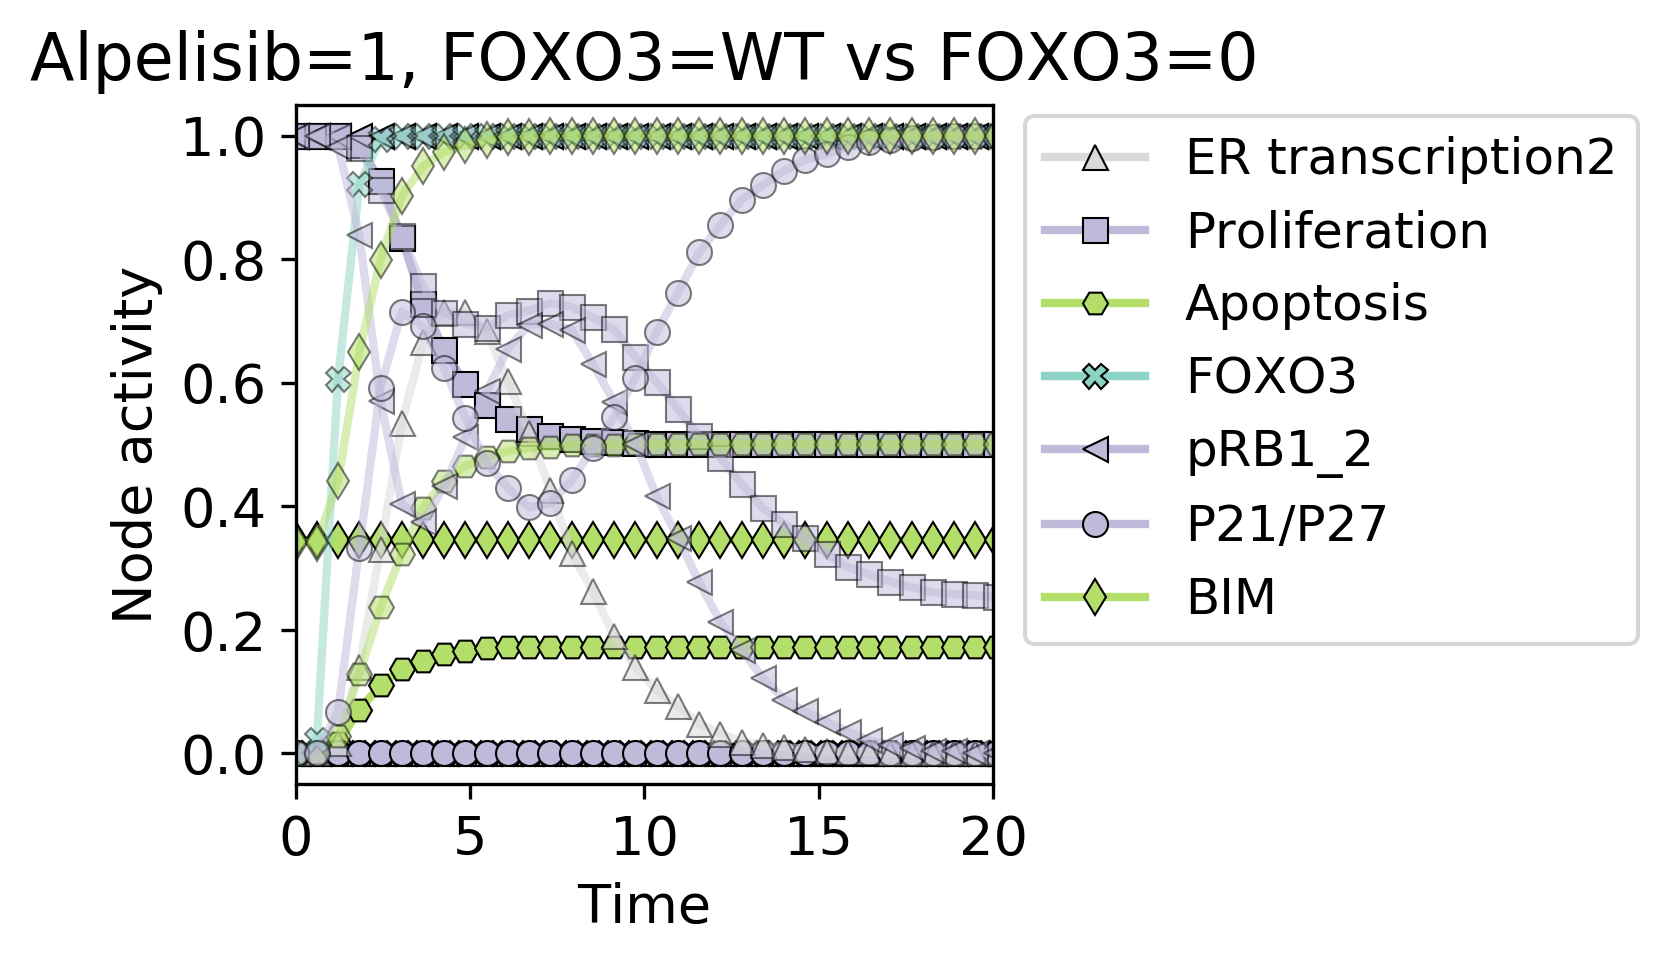

In [56]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1-vs-Alpelisib_1_FOXO3_0'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
df_plot2=df_timecourse_alpelisib_1_foxo3_0.iloc[::3, :]
ax = plt.gca()
df_plot2.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='p21_p27',marker='o',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='ER_transcription_2',marker='^',linestyle='-',color="#d9d9d9",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='FOXO3',marker='X',linestyle='-',c="#8dd3c3",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='p21_p27',marker='o',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
plt.legend(["ER transcription2",'Proliferation','Apoptosis',"FOXO3","pRB1_2","P21/P27","BIM"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, FOXO3=WT vs FOXO3=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

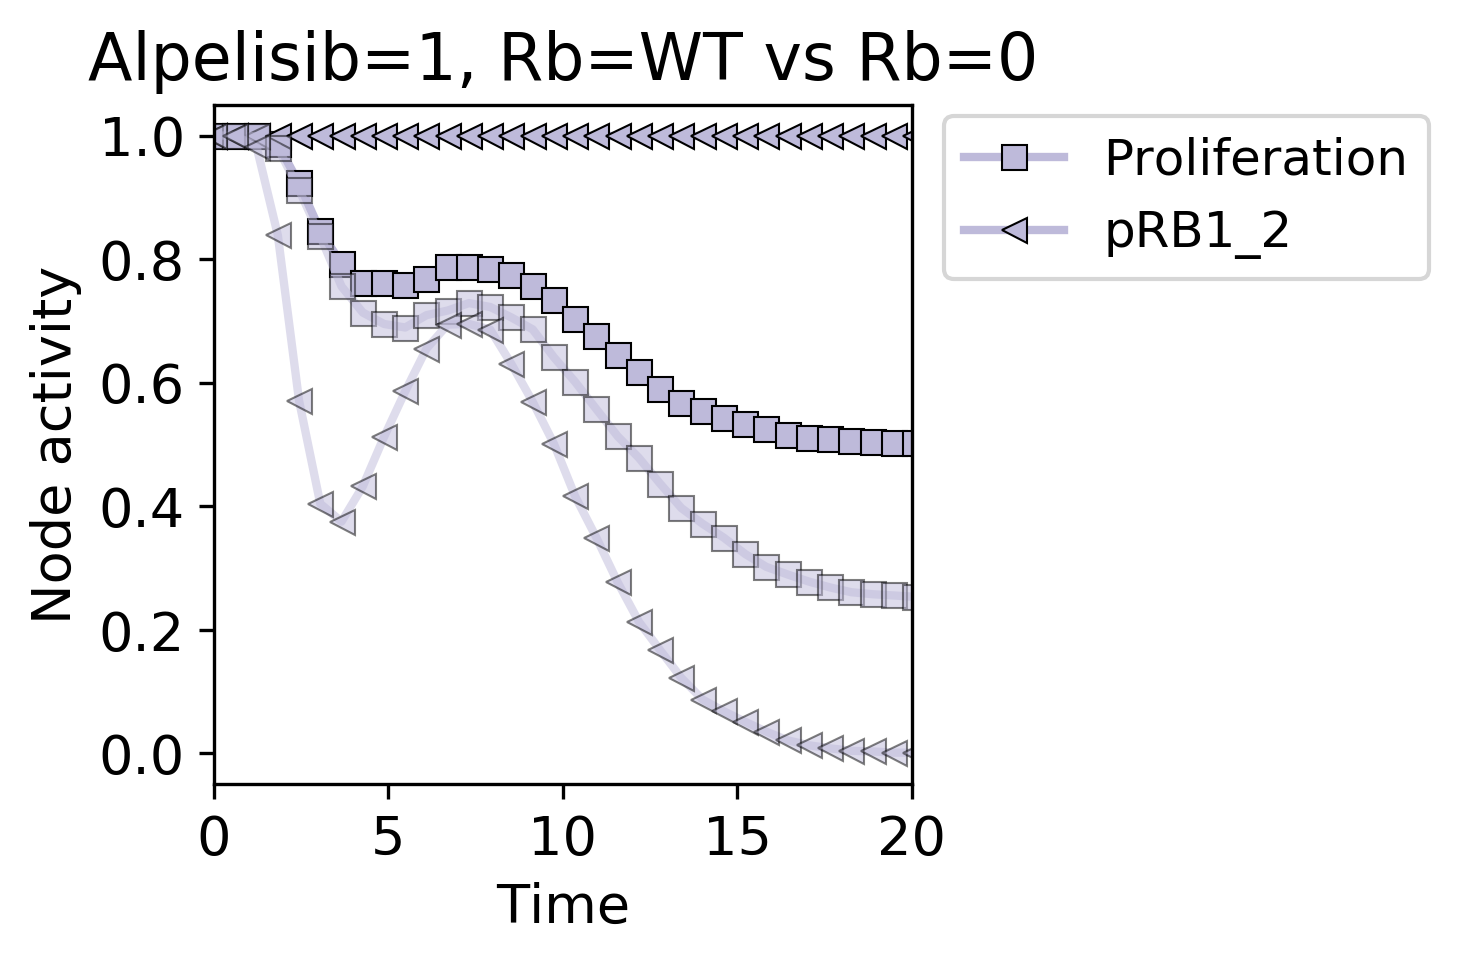

In [57]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1-vs-Alpelisib_1_pRb2_1'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
df_plot2=df_timecourse_alpelisib_1_pRb2_1.iloc[::3, :]
ax = plt.gca()
df_plot2.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
plt.legend(['Proliferation',"pRB1_2"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, Rb=WT vs Rb=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

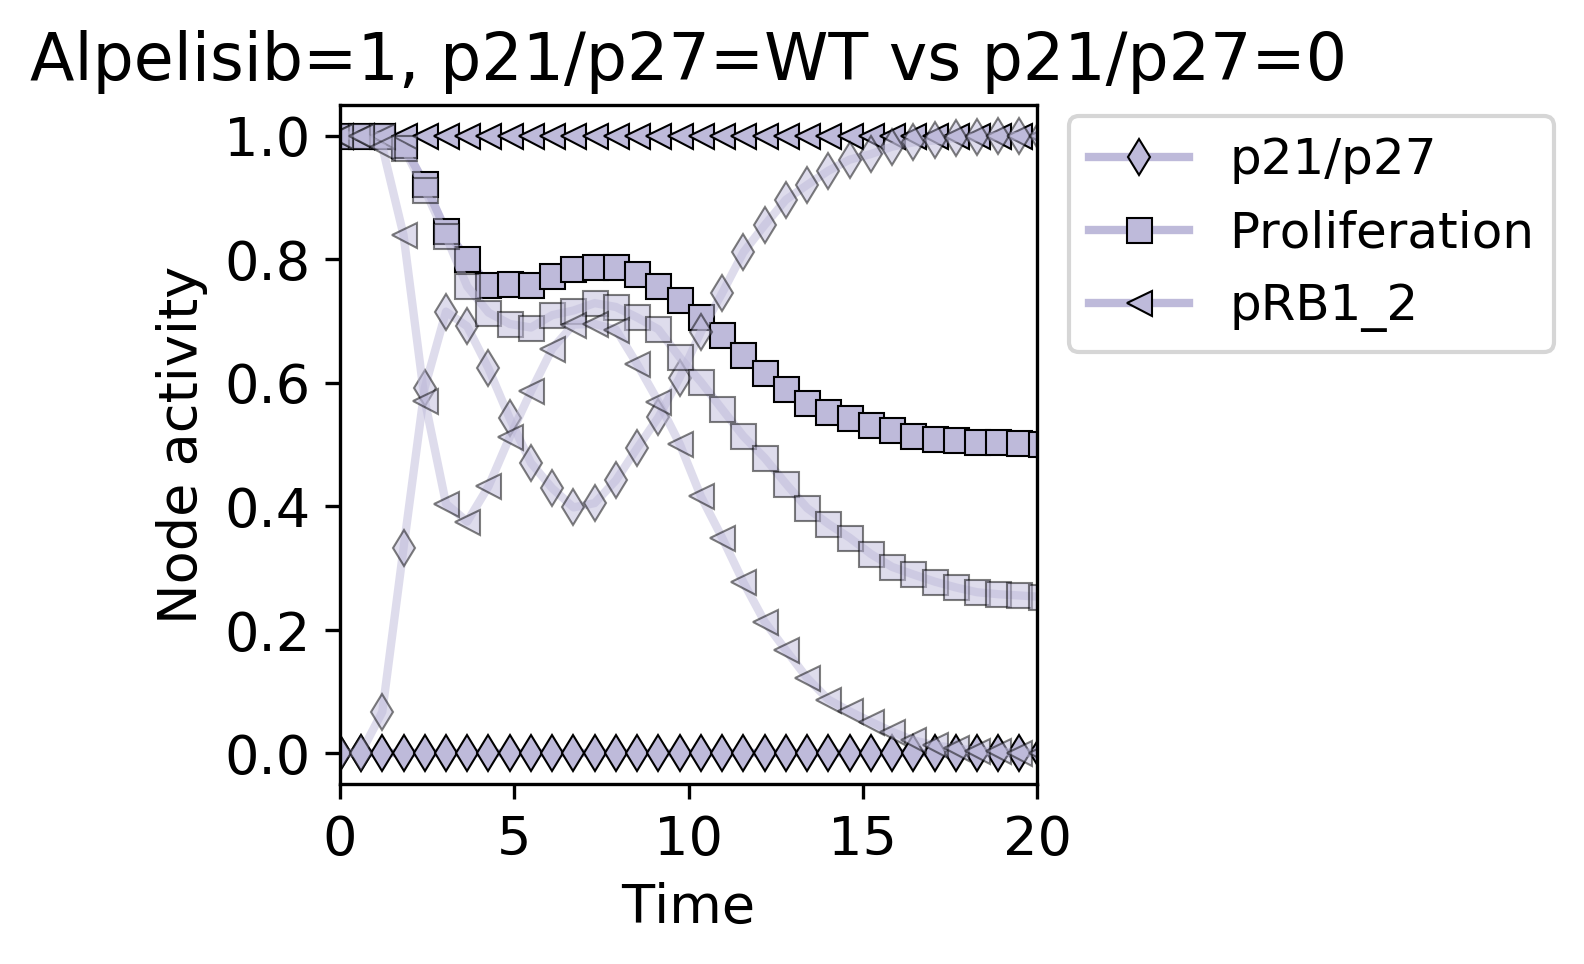

In [58]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1-vs-Alpelisib_1_p21_p27_0'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
df_plot2=df_timecourse_alpelisib_1_P21P27_0.iloc[::3, :]
ax = plt.gca()
df_plot2.plot(kind='line',x='time',y='p21_p27',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='p21_p27',marker='d',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='Proliferation_norm',marker='s',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='pRb_2',marker='<',linestyle='-',c="#bebada",markeredgecolor = 'black',alpha=0.5,ax=ax)
plt.legend(['p21/p27','Proliferation',"pRB1_2"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, p21/p27=WT vs p21/p27=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

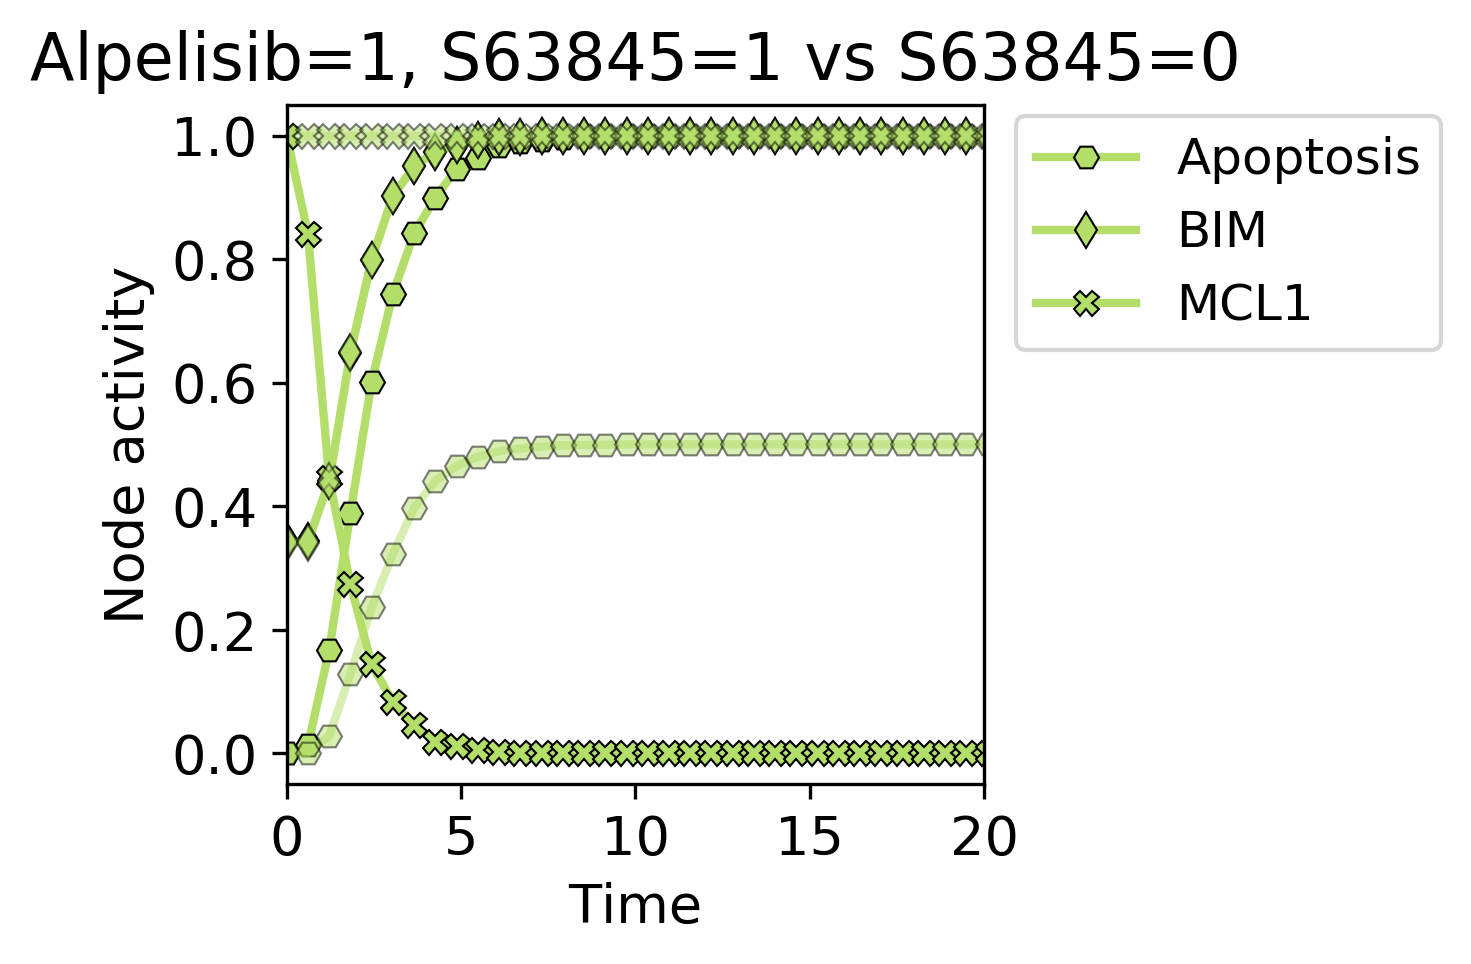

In [59]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1-vs-Alpelisib_1_S63845_1'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
df_plot2=df_timecourse_alpelisib_1_S63845_1.iloc[::3, :]
ax = plt.gca()
df_plot2.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='MCL1',marker='X',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='BIM',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='MCL1',marker='X',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
plt.legend(['Apoptosis',"BIM","MCL1"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, S63845=1 vs S63845=0")
plt.xlim([0,20])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 

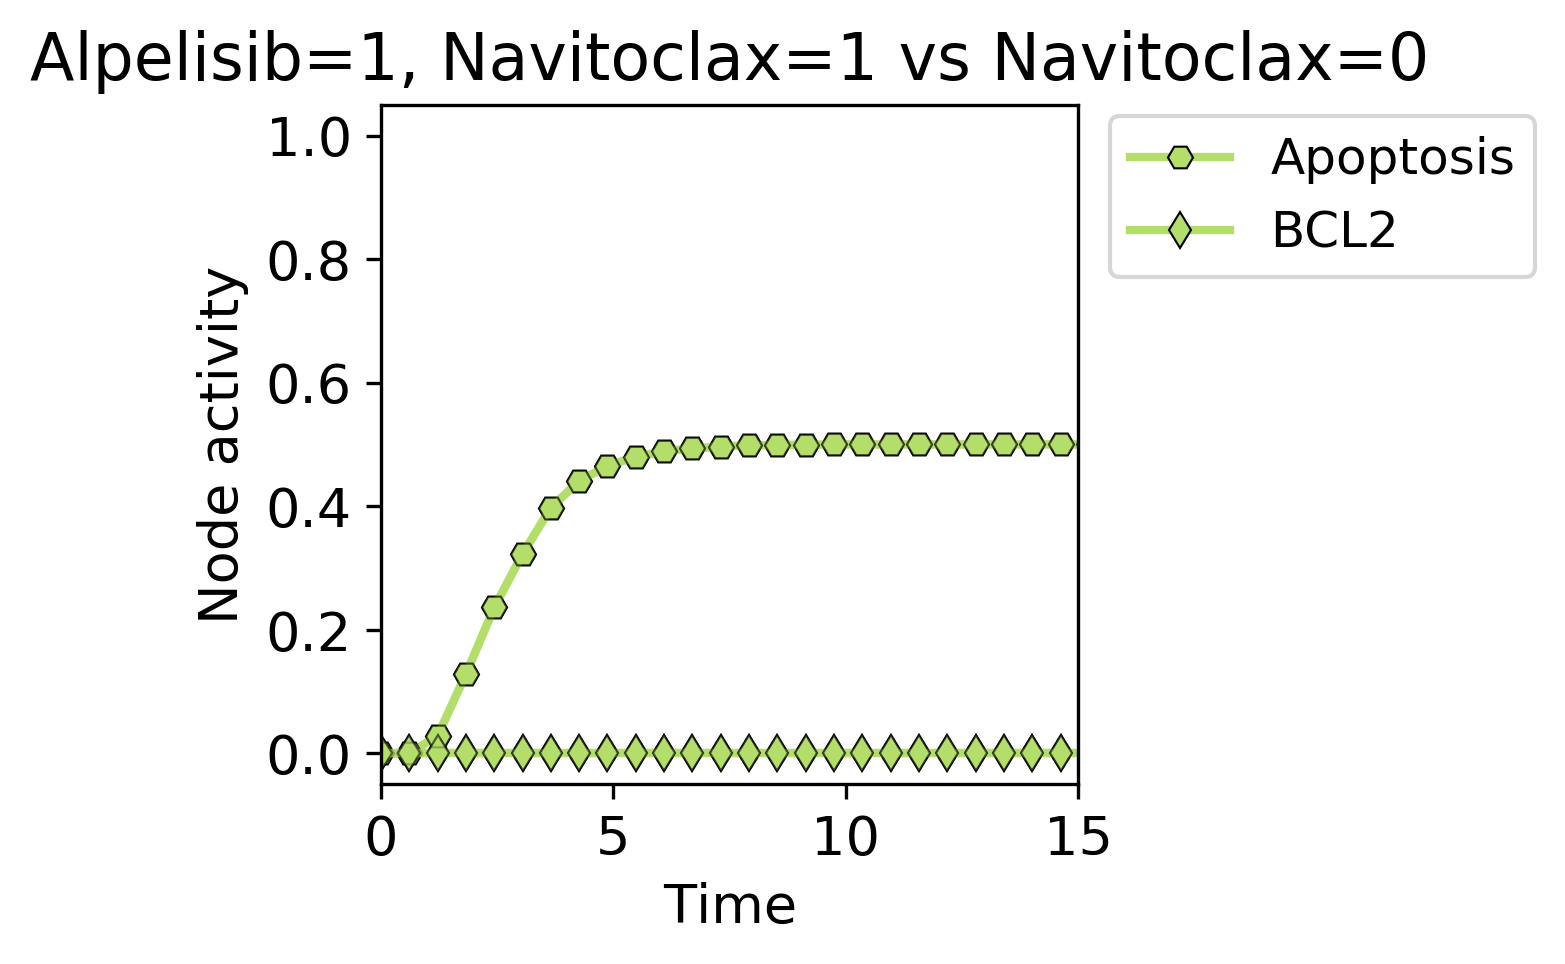

In [60]:
filename='figures/BreastCancerModel_Mod0420_Alpelisib_1-vs-Alpelisib_1_Navitoclax_1'
df_plot=df_timecourse_alpelisib_1.iloc[::3, :]
df_plot2=df_timecourse_alpelisib_1_Navitoclax_1.iloc[::3, :]
ax = plt.gca()
df_plot2.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot2.plot(kind='line',x='time',y='BCL2',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',ax=ax)
df_plot.plot(kind='line',x='time',y='Apoptosis_norm',marker='H',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
df_plot.plot(kind='line',x='time',y='BCL2',marker='d',linestyle='-',c="#b3de69",markeredgecolor = 'black',alpha=0.5,ax=ax)
plt.legend(['Apoptosis',"BCL2"],bbox_to_anchor=(1.01, 1.02), loc=2, prop={'size':12})
plt.ylabel('Node activity')
plt.xlabel('Time')
plt.title("Alpelisib=1, Navitoclax=1 vs Navitoclax=0")
plt.xlim([0,15])
plt.ylim([-0.05,1.05])
savefig(filename+'.svg', bbox_inches='tight',dpi=450)
savefig(filename+'.png', bbox_inches='tight',dpi=300)
plt.close()
Image(filename=filename+".png") 